In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [93]:
def Radius(X): 
    R2,R3,B,L_m,L_r,h = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    #return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    A1 = ((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    #A2 = (B/((0.99497192*R2**1.55620764*R3**(-2.77937455))*np.exp(-0.92376442*(R3-R2)/L_m)*(h**0.08060702)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.1223844)
    A2 = (B/((1.71951251*R2**2.10853942*R3**(-3.7047729))*np.exp(-19.28562192/L_m)*(h**0.06469294)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.38270461)
    return(A2)

In [7]:
def MagField(X,a,b,c,d,e,f):
    R2,R3,R4,h,L,B_rem = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(h**f))

In [8]:
def MField(X,a,b,c,d,e):
    V_gap,V_mag,V_out,L,B_rem,R_4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R_4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [9]:
def MField_2(X,a,b,c,d,e,f,g):
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [10]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return( 0.44774473*P1+0.69113695*P2-0.46543184*P3+0.02740828*P4-1.2412753 *P5)
    #return(0.271043*P1+0.49653155*P2-0.28565907*P3+1*P4-1.13502211*P5)
    return(0.66679759*P1+  0.8505155*P2 -0.6893551*P3 -0.94156247*P4-0.34938015*P5)

In [19]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    #return(0.46673225*P1+1.40322589*P2-0.49908018*P3+0.01575257*P4-0.68914607*P5)
    #return(0.36735687*P1+1*P2-0.38713269*P3+1*P4-0.21881993*P5)
    return(0.77855664*P1+ 1.44966907*P2 -0.80985607*P3+ 0.39133248*P4+  0.65808892*P5)

In [20]:
def W_m(X):
    P1,P2,P3 = X
    #a = 0.00541105
    #a = 0.00937193
    a = 2.89392107e-03
    
    #b = -2.21029128
    #b = -0.99809109
    b = -3.14070133e+00
    
    #c = 2.84461382
    #c = 4.33008264
    c = 3.20699560e+00
    
    #d = 2.85861479
    #d = 1.61088792
    d = 3.81307556e+00
    
    return(a*P1**b*P2**c*P3**d )

In [21]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [22]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [23]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_ma = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]


Calculation

In [637]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt,h_f):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    
    t_h = 4
    t_w = 2.5
    N_reg = 4/FE
    
    #Regenerador Quadrad
    R2 = [W/2+t_w]/np.tan(np.pi/N_reg)-t_h
    R3 = np.sqrt((W/2)**2 + (R2+t_h+H)**2)+t_h
    
   
    
    #R_aux = np.sqrt((R2+t_h)**2-(W/2)**2)
    #R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    #Regenerador Circular
    
    #R_med = (4/FE)/(2*np.pi)*(W + 2*t_w)
    #R2 = R_med-(H/2+t_h)
    #R3 = R_med+(H/2+t_h)
    
    #A_st = H*W
    #A_aux_st = ((2*np.pi/(4/FE)-4*t_w/(R2+R3))/2)*((R3-t_h)**2-(R2+t_h)**2)
    A_aux_st = (np.pi/(4/FE))*((R3-t_h)**2-(R2+t_h)**2) - 2*t_w*((R3-t_h)-(R2+t_h))
    A_st = A_aux_st[0]
    

    m_s   = L*A_st*10**-9*(1-Epsilon)*rho_s #mass of the AMR

    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*A_st*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon_dp)/Epsilon_dp)+((1-Epsilon_dp)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*A_st*10**(-9))/(m_f*c_f) 
    #print(Re_dp)
    #dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    
    dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##
    Pi_4 = CdT_mg/CdT_dmg
    Pi_6 = ((m_f)*c_f)/(m_s*C_L*f)
    Pi_11 = ((m_f)*c_f)/(m_s*C_H*f)
    
    
    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_mag = m_s*f*CdT_dmg*W_m((Pi_6,Pi_4,Pi_11))
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L,h_f))
    

    
    #print(m_s,f,CdT_dmg,((Pi_6,Pi_4,Pi_11)))
    

    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL)

In [808]:
H

array([25, 30, 35, 40])

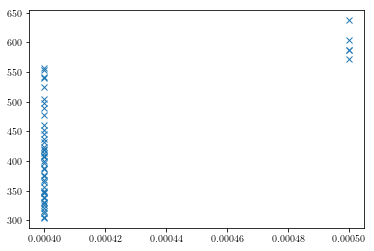

In [827]:
plt.plot(dp_p,m_p,'x')

In [946]:
m_f = np.arange(400,900,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1,3.1,0.5)
L = np.arange(120,181,10)
H = np.arange(25,51,5)
W = np.arange(35,61,5)
B_max = np.arange(1.25,1.36,0.05)
Tce = np.arange(14,17,4)
The = np.arange(43,47,4)
L_xt = np.arange(0.1,0.38,0.07)
d_par = np.arange(500*10**-6,501*10**-6,100*10**-6)
h_f = np.arange(15,21,5)
#d_par = [500*10**-6]

In [947]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)

30240

In [948]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 3100

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []
dp_target = []
hf_target = []

##Properties of the solid 
rho_s = 7900  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium


#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    for r in range(len(d_par)):
                                        for s in range(len(h_f)):
                                            it = 0
                                            Q_c_system = 0

                                            d_p = d_par[r] #[m] Particle diameter

                                            Epsilon = 0.5 #0.55  #[-] Porosity
                                            Epsilon_ep = 0.09
                                            Epsilon_dp = Epsilon - Epsilon_ep #0.36 #0.465 #[-] Porosity
                                            d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
                                            #h_f = 40

                                            while Q_c_system < Q_c_target and it < len(m_f):
                                                A,B,C,D,E,F,G,A1,A2,A3,A4 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q],h_f[s])
                                                Q_c_system = A[0]
                                                it = it + 1
                                                #print(A,B,C,D,E,F,G,A1,A2,A3)
                                                #print(m_f[it-1]*3600,Q_c_system )
                                            #print(it,Q_c_system)
                                            if Q_c_system > Q_c_target:
                                                Q_c.append(Q_c_system)
                                                m_f_target.append(3600*m_f[it-1])
                                                FE_target.append(FE[i])
                                                f_target.append(f[j])
                                                L_target.append(L[k])
                                                H_target.append(H[l])
                                                W_target.append(W[m])
                                                Tce_target.append(Tce[n])
                                                The_target.append(The[o])
                                                B_target.append(B_max[p])
                                                dp_target.append(d_p)
                                                hf_target.append(h_f[s])
                                                
                                                
                                                ECr_c.append(B[0])
                                                ECr_h.append(C[0])
                                                R4.append(D[0])
                                                R3.append(E[0])
                                                R2.append(F[0])
                                                W_mag.append(G)
                                                W_pump.append(A1)
                                                Q_h.append(A2[0])
                                                L_xt_target.append(A3)
                                                FL_target.append(A4)

                                            cont = cont+1
                                    print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)))


0.006613756613756613
0.013227513227513227
0.01984126984126984
0.026455026455026454
0.03306878306878307
0.03968253968253968
0.046296296296296294
0.05291005291005291
0.05952380952380952
0.06613756613756613
0.07275132275132275
0.07936507936507936
0.08597883597883597
0.09259259259259259
0.0992063492063492
0.10582010582010581
0.11243386243386243
0.11904761904761904
0.12566137566137567
0.13227513227513227
0.1388888888888889
0.1455026455026455
0.15211640211640212
0.15873015873015872
0.16534391534391535
0.17195767195767195
0.17857142857142858
0.18518518518518517
0.1917989417989418
0.1984126984126984
0.20502645502645503
0.21164021164021163
0.21825396825396826
0.22486772486772486
0.23148148148148148
0.23809523809523808
0.2447089947089947
0.25132275132275134
0.25793650793650796
0.26455026455026454
0.27116402116402116
0.2777777777777778
0.2843915343915344
0.291005291005291
0.2976190476190476
0.30423280423280424
0.31084656084656087
0.31746031746031744
0.32407407407407407
0.3306878306878307
0.337301

2.89021164021164
2.8968253968253967
2.9034391534391535
2.9100529100529102
2.9166666666666665
2.9232804232804233
2.92989417989418
2.9365079365079363
2.943121693121693
2.9497354497354498
2.9563492063492065
2.962962962962963
2.9695767195767195
2.9761904761904763
2.982804232804233
2.9894179894179893
2.996031746031746
3.002645502645503
3.009259259259259
3.015873015873016
3.0224867724867726
3.0291005291005293
3.0357142857142856
3.0423280423280423
3.048941798941799
3.0555555555555554
3.062169312169312
3.068783068783069
3.0753968253968256
3.082010582010582
3.0886243386243386
3.0952380952380953
3.1018518518518516
3.1084656084656084
3.115079365079365
3.121693121693122
3.128306878306878
3.134920634920635
3.1415343915343916
3.1481481481481484
3.1547619047619047
3.1613756613756614
3.167989417989418
3.1746031746031744
3.181216931216931
3.187830687830688
3.1944444444444446
3.201058201058201
3.2076719576719577
3.2142857142857144
3.2208994708994707
3.2275132275132274
3.234126984126984
3.240740740740741

8.948412698412698
8.955026455026456
8.961640211640212
8.968253968253968
8.974867724867725
8.981481481481481
8.988095238095237
8.994708994708995
9.001322751322752
9.007936507936508
9.014550264550264
9.02116402116402
9.027777777777779
9.034391534391535
9.041005291005291
9.047619047619047
9.054232804232804
9.06084656084656
9.067460317460318
9.074074074074074
9.08068783068783
9.087301587301587
9.093915343915343
9.100529100529101
9.107142857142858
9.113756613756614
9.12037037037037
9.126984126984127
9.133597883597883
9.140211640211641
9.146825396825397
9.153439153439153
9.16005291005291
9.166666666666666
9.173280423280424
9.17989417989418
9.186507936507937
9.193121693121693
9.19973544973545
9.206349206349206
9.212962962962964
9.21957671957672
9.226190476190476
9.232804232804233
9.239417989417989
9.246031746031745
9.252645502645503
9.25925925925926
9.265873015873016
9.272486772486772
9.279100529100528
9.285714285714286
9.292328042328043
9.298941798941799
9.305555555555555
9.312169312169312
9

11.898148148148149
11.904761904761905
11.911375661375661
11.917989417989418
11.924603174603174
11.931216931216932
11.937830687830688
11.944444444444445
11.951058201058201
11.957671957671957
11.964285714285714
11.970899470899472
11.977513227513228
11.984126984126984
11.99074074074074
11.997354497354497
12.003968253968255
12.010582010582011
12.017195767195767
12.023809523809524
12.03042328042328
12.037037037037036
12.043650793650794
12.05026455026455
12.056878306878307
12.063492063492063
12.07010582010582
12.076719576719576
12.083333333333334
12.08994708994709
12.096560846560847
12.103174603174603
12.109788359788359
12.116402116402117
12.123015873015873
12.12962962962963
12.136243386243386
12.142857142857142
12.149470899470899
12.156084656084657
12.162698412698413
12.16931216931217
12.175925925925926
12.182539682539682
12.18915343915344
12.195767195767196
12.202380952380953
12.208994708994709
12.215608465608465
12.222222222222221
12.22883597883598
12.235449735449736
12.242063492063492
12

14.808201058201059
14.814814814814815
14.821428571428571
14.828042328042327
14.834656084656086
14.841269841269842
14.847883597883598
14.854497354497354
14.86111111111111
14.867724867724867
14.874338624338625
14.880952380952381
14.887566137566138
14.894179894179894
14.90079365079365
14.907407407407407
14.914021164021165
14.920634920634921
14.927248677248677
14.933862433862434
14.94047619047619
14.947089947089948
14.953703703703704
14.96031746031746
14.966931216931217
14.973544973544973
14.98015873015873
14.986772486772487
14.993386243386244
15.0
15.006613756613756
15.013227513227513
15.01984126984127
15.026455026455027
15.033068783068783
15.03968253968254
15.046296296296296
15.052910052910052
15.05952380952381
15.066137566137566
15.072751322751323
15.079365079365079
15.085978835978835
15.092592592592593
15.09920634920635
15.105820105820106
15.112433862433862
15.119047619047619
15.125661375661375
15.132275132275133
15.13888888888889
15.145502645502646
15.152116402116402
15.15873015873015

17.771164021164022
17.77777777777778
17.784391534391535
17.79100529100529
17.797619047619047
17.804232804232804
17.81084656084656
17.817460317460316
17.824074074074073
17.83068783068783
17.83730158730159
17.843915343915345
17.8505291005291
17.857142857142858
17.863756613756614
17.87037037037037
17.876984126984127
17.883597883597883
17.89021164021164
17.896825396825395
17.90343915343915
17.91005291005291
17.916666666666668
17.923280423280424
17.92989417989418
17.936507936507937
17.943121693121693
17.94973544973545
17.956349206349206
17.962962962962962
17.969576719576718
17.976190476190474
17.982804232804234
17.98941798941799
17.996031746031747
18.002645502645503
18.00925925925926
18.015873015873016
18.022486772486772
18.02910052910053
18.035714285714285
18.04232804232804
18.048941798941797
18.055555555555557
18.062169312169313
18.06878306878307
18.075396825396826
18.082010582010582
18.08862433862434
18.095238095238095
18.10185185185185
18.108465608465607
18.115079365079364
18.1216931216

20.701058201058203
20.70767195767196
20.714285714285715
20.72089947089947
20.727513227513228
20.734126984126984
20.74074074074074
20.747354497354497
20.753968253968253
20.76058201058201
20.767195767195766
20.773809523809526
20.780423280423282
20.787037037037038
20.793650793650794
20.80026455026455
20.806878306878307
20.813492063492063
20.82010582010582
20.826719576719576
20.833333333333332
20.83994708994709
20.84656084656085
20.853174603174605
20.85978835978836
20.866402116402117
20.873015873015873
20.87962962962963
20.886243386243386
20.892857142857142
20.8994708994709
20.906084656084655
20.91269841269841
20.91931216931217
20.925925925925927
20.932539682539684
20.93915343915344
20.945767195767196
20.952380952380953
20.95899470899471
20.965608465608465
20.97222222222222
20.978835978835978
20.985449735449734
20.99206349206349
20.99867724867725
21.005291005291006
21.011904761904763
21.01851851851852
21.025132275132275
21.03174603174603
21.038359788359788
21.044973544973544
21.05158730158

23.664021164021165
23.67063492063492
23.677248677248677
23.683862433862434
23.69047619047619
23.697089947089946
23.703703703703702
23.71031746031746
23.71693121693122
23.723544973544975
23.73015873015873
23.736772486772487
23.743386243386244
23.75
23.756613756613756
23.763227513227513
23.76984126984127
23.776455026455025
23.78306878306878
23.78968253968254
23.796296296296298
23.802910052910054
23.80952380952381
23.816137566137566
23.822751322751323
23.82936507936508
23.835978835978835
23.84259259259259
23.849206349206348
23.855820105820104
23.862433862433864
23.86904761904762
23.875661375661377
23.882275132275133
23.88888888888889
23.895502645502646
23.902116402116402
23.908730158730158
23.915343915343914
23.92195767195767
23.928571428571427
23.935185185185187
23.941798941798943
23.9484126984127
23.955026455026456
23.961640211640212
23.96825396825397
23.974867724867725
23.98148148148148
23.988095238095237
23.994708994708994
24.00132275132275
24.00793650793651
24.014550264550266
24.0211

26.607142857142858
26.613756613756614
26.62037037037037
26.626984126984127
26.633597883597883
26.64021164021164
26.646825396825395
26.65343915343915
26.66005291005291
26.666666666666668
26.673280423280424
26.67989417989418
26.686507936507937
26.693121693121693
26.69973544973545
26.706349206349206
26.712962962962962
26.719576719576718
26.726190476190474
26.732804232804234
26.73941798941799
26.746031746031747
26.752645502645503
26.75925925925926
26.765873015873016
26.772486772486772
26.77910052910053
26.785714285714285
26.79232804232804
26.798941798941797
26.805555555555557
26.812169312169313
26.81878306878307
26.825396825396826
26.832010582010582
26.83862433862434
26.845238095238095
26.85185185185185
26.858465608465607
26.865079365079364
26.87169312169312
26.87830687830688
26.884920634920636
26.891534391534393
26.89814814814815
26.904761904761905
26.91137566137566
26.917989417989418
26.924603174603174
26.93121693121693
26.937830687830687
26.944444444444443
26.951058201058203
26.95767195

29.563492063492063
29.57010582010582
29.576719576719576
29.583333333333332
29.58994708994709
29.59656084656085
29.603174603174605
29.60978835978836
29.616402116402117
29.623015873015873
29.62962962962963
29.636243386243386
29.642857142857142
29.6494708994709
29.656084656084655
29.66269841269841
29.66931216931217
29.675925925925927
29.682539682539684
29.68915343915344
29.695767195767196
29.702380952380953
29.70899470899471
29.715608465608465
29.72222222222222
29.728835978835978
29.735449735449734
29.74206349206349
29.74867724867725
29.755291005291006
29.761904761904763
29.76851851851852
29.775132275132275
29.78174603174603
29.788359788359788
29.794973544973544
29.8015873015873
29.808201058201057
29.814814814814813
29.821428571428573
29.82804232804233
29.834656084656086
29.841269841269842
29.847883597883598
29.854497354497354
29.86111111111111
29.867724867724867
29.874338624338623
29.88095238095238
29.887566137566136
29.894179894179896
29.900793650793652
29.90740740740741
29.914021164021

32.526455026455025
32.533068783068785
32.53968253968254
32.5462962962963
32.55291005291005
32.55952380952381
32.56613756613756
32.57275132275132
32.57936507936508
32.585978835978835
32.592592592592595
32.59920634920635
32.60582010582011
32.61243386243386
32.61904761904762
32.62566137566137
32.63227513227513
32.638888888888886
32.645502645502646
32.652116402116405
32.65873015873016
32.66534391534392
32.67195767195767
32.67857142857143
32.68518518518518
32.69179894179894
32.698412698412696
32.705026455026456
32.71164021164021
32.71825396825397
32.72486772486773
32.73148148148148
32.73809523809524
32.74470899470899
32.75132275132275
32.757936507936506
32.764550264550266
32.77116402116402
32.77777777777778
32.78439153439153
32.79100529100529
32.79761904761905
32.804232804232804
32.810846560846564
32.817460317460316
32.824074074074076
32.83068783068783
32.83730158730159
32.84391534391534
32.8505291005291
32.857142857142854
32.863756613756614
32.870370370370374
32.87698412698413
32.883597883

35.52248677248677
35.52910052910053
35.535714285714285
35.542328042328045
35.5489417989418
35.55555555555556
35.56216931216931
35.56878306878307
35.57539682539682
35.58201058201058
35.58862433862434
35.595238095238095
35.601851851851855
35.60846560846561
35.61507936507937
35.62169312169312
35.62830687830688
35.63492063492063
35.64153439153439
35.648148148148145
35.654761904761905
35.66137566137566
35.66798941798942
35.67460317460318
35.68121693121693
35.68783068783069
35.69444444444444
35.7010582010582
35.707671957671955
35.714285714285715
35.72089947089947
35.72751322751323
35.73412698412698
35.74074074074074
35.7473544973545
35.75396825396825
35.76058201058201
35.767195767195766
35.773809523809526
35.78042328042328
35.78703703703704
35.79365079365079
35.80026455026455
35.8068783068783
35.81349206349206
35.82010582010582
35.826719576719576
35.833333333333336
35.83994708994709
35.84656084656085
35.8531746031746
35.85978835978836
35.866402116402114
35.87301587301587
35.879629629629626
3

38.611111111111114
38.61772486772487
38.62433862433863
38.63095238095238
38.63756613756614
38.64417989417989
38.65079365079365
38.657407407407405
38.664021164021165
38.67063492063492
38.67724867724868
38.68386243386244
38.69047619047619
38.69708994708995
38.7037037037037
38.71031746031746
38.716931216931215
38.723544973544975
38.73015873015873
38.73677248677249
38.74338624338624
38.75
38.75661375661376
38.76322751322751
38.76984126984127
38.776455026455025
38.783068783068785
38.78968253968254
38.7962962962963
38.80291005291005
38.80952380952381
38.81613756613756
38.82275132275132
38.82936507936508
38.835978835978835
38.842592592592595
38.84920634920635
38.85582010582011
38.86243386243386
38.86904761904762
38.87566137566137
38.88227513227513
38.888888888888886
38.895502645502646
38.902116402116405
38.90873015873016
38.91534391534392
38.92195767195767
38.92857142857143
38.93518518518518
38.94179894179894
38.948412698412696
38.955026455026456
38.96164021164021
38.96825396825397
38.9748677

41.607142857142854
41.613756613756614
41.620370370370374
41.62698412698413
41.633597883597886
41.64021164021164
41.6468253968254
41.65343915343915
41.66005291005291
41.666666666666664
41.673280423280424
41.67989417989418
41.68650793650794
41.6931216931217
41.69973544973545
41.70634920634921
41.71296296296296
41.71957671957672
41.726190476190474
41.732804232804234
41.73941798941799
41.74603174603175
41.7526455026455
41.75925925925926
41.76587301587302
41.77248677248677
41.77910052910053
41.785714285714285
41.792328042328045
41.7989417989418
41.80555555555556
41.81216931216931
41.81878306878307
41.82539682539682
41.83201058201058
41.83862433862434
41.845238095238095
41.851851851851855
41.85846560846561
41.86507936507937
41.87169312169312
41.87830687830688
41.88492063492063
41.89153439153439
41.898148148148145
41.904761904761905
41.91137566137566
41.91798941798942
41.92460317460318
41.93121693121693
41.93783068783069
41.94444444444444
41.9510582010582
41.957671957671955
41.964285714285715

44.65608465608466
44.66269841269841
44.66931216931217
44.675925925925924
44.682539682539684
44.689153439153436
44.695767195767196
44.70238095238095
44.70899470899471
44.71560846560847
44.72222222222222
44.72883597883598
44.735449735449734
44.742063492063494
44.74867724867725
44.75529100529101
44.76190476190476
44.76851851851852
44.77513227513227
44.78174603174603
44.78835978835979
44.794973544973544
44.801587301587304
44.80820105820106
44.81481481481482
44.82142857142857
44.82804232804233
44.83465608465608
44.84126984126984
44.847883597883595
44.854497354497354
44.861111111111114
44.86772486772487
44.87433862433863
44.88095238095238
44.88756613756614
44.89417989417989
44.90079365079365
44.907407407407405
44.914021164021165
44.92063492063492
44.92724867724868
44.93386243386244
44.94047619047619
44.94708994708995
44.9537037037037
44.96031746031746
44.966931216931215
44.973544973544975
44.98015873015873
44.98677248677249
44.99338624338624
45.0
45.00661375661376
45.01322751322751
45.019841

47.645502645502646
47.652116402116405
47.65873015873016
47.66534391534392
47.67195767195767
47.67857142857143
47.68518518518518
47.69179894179894
47.698412698412696
47.705026455026456
47.71164021164021
47.71825396825397
47.72486772486773
47.73148148148148
47.73809523809524
47.74470899470899
47.75132275132275
47.757936507936506
47.764550264550266
47.77116402116402
47.77777777777778
47.78439153439153
47.79100529100529
47.79761904761905
47.804232804232804
47.810846560846564
47.817460317460316
47.824074074074076
47.83068783068783
47.83730158730159
47.84391534391534
47.8505291005291
47.857142857142854
47.863756613756614
47.870370370370374
47.87698412698413
47.883597883597886
47.89021164021164
47.8968253968254
47.90343915343915
47.91005291005291
47.916666666666664
47.923280423280424
47.92989417989418
47.93650793650794
47.9431216931217
47.94973544973545
47.95634920634921
47.96296296296296
47.96957671957672
47.976190476190474
47.982804232804234
47.98941798941799
47.99603174603175
48.0026455026

50.68783068783069
50.69444444444444
50.7010582010582
50.707671957671955
50.714285714285715
50.72089947089947
50.72751322751323
50.73412698412698
50.74074074074074
50.7473544973545
50.75396825396825
50.76058201058201
50.767195767195766
50.773809523809526
50.78042328042328
50.78703703703704
50.79365079365079
50.80026455026455
50.8068783068783
50.81349206349206
50.82010582010582
50.826719576719576
50.833333333333336
50.83994708994709
50.84656084656085
50.8531746031746
50.85978835978836
50.866402116402114
50.87301587301587
50.879629629629626
50.886243386243386
50.892857142857146
50.8994708994709
50.90608465608466
50.91269841269841
50.91931216931217
50.925925925925924
50.932539682539684
50.939153439153436
50.945767195767196
50.95238095238095
50.95899470899471
50.96560846560847
50.97222222222222
50.97883597883598
50.985449735449734
50.992063492063494
50.99867724867725
51.00529100529101
51.01190476190476
51.01851851851852
51.02513227513227
51.03174603174603
51.03835978835979
51.04497354497354

53.68386243386244
53.69047619047619
53.69708994708995
53.7037037037037
53.71031746031746
53.716931216931215
53.723544973544975
53.73015873015873
53.73677248677249
53.74338624338624
53.75
53.75661375661376
53.76322751322751
53.76984126984127
53.776455026455025
53.783068783068785
53.78968253968254
53.7962962962963
53.80291005291005
53.80952380952381
53.81613756613756
53.82275132275132
53.82936507936508
53.835978835978835
53.842592592592595
53.84920634920635
53.85582010582011
53.86243386243386
53.86904761904762
53.87566137566137
53.88227513227513
53.888888888888886
53.895502645502646
53.902116402116405
53.90873015873016
53.91534391534392
53.92195767195767
53.92857142857143
53.93518518518518
53.94179894179894
53.948412698412696
53.955026455026456
53.96164021164021
53.96825396825397
53.97486772486773
53.98148148148148
53.98809523809524
53.99470899470899
54.00132275132275
54.007936507936506
54.014550264550266
54.02116402116402
54.02777777777778
54.03439153439153
54.04100529100529
54.04761904

56.7526455026455
56.75925925925926
56.76587301587302
56.77248677248677
56.77910052910053
56.785714285714285
56.792328042328045
56.7989417989418
56.80555555555556
56.81216931216931
56.81878306878307
56.82539682539682
56.83201058201058
56.83862433862434
56.845238095238095
56.851851851851855
56.85846560846561
56.86507936507937
56.87169312169312
56.87830687830688
56.88492063492063
56.89153439153439
56.898148148148145
56.904761904761905
56.91137566137566
56.91798941798942
56.92460317460318
56.93121693121693
56.93783068783069
56.94444444444444
56.9510582010582
56.957671957671955
56.964285714285715
56.97089947089947
56.97751322751323
56.98412698412698
56.99074074074074
56.9973544973545
57.00396825396825
57.01058201058201
57.017195767195766
57.023809523809526
57.03042328042328
57.03703703703704
57.04365079365079
57.05026455026455
57.0568783068783
57.06349206349206
57.07010582010582
57.076719576719576
57.083333333333336
57.08994708994709
57.09656084656085
57.1031746031746
57.10978835978836
57.1

59.88095238095238
59.88756613756614
59.89417989417989
59.90079365079365
59.907407407407405
59.914021164021165
59.92063492063492
59.92724867724868
59.93386243386244
59.94047619047619
59.94708994708995
59.9537037037037
59.96031746031746
59.966931216931215
59.973544973544975
59.98015873015873
59.98677248677249
59.99338624338624
60.0
60.00661375661376
60.01322751322751
60.01984126984127
60.026455026455025
60.033068783068785
60.03968253968254
60.0462962962963
60.05291005291005
60.05952380952381
60.06613756613756
60.07275132275132
60.07936507936508
60.085978835978835
60.092592592592595
60.09920634920635
60.10582010582011
60.11243386243386
60.11904761904762
60.12566137566137
60.13227513227513
60.138888888888886
60.145502645502646
60.152116402116405
60.15873015873016
60.16534391534392
60.17195767195767
60.17857142857143
60.18518518518518
60.19179894179894
60.198412698412696
60.205026455026456
60.21164021164021
60.21825396825397
60.22486772486773
60.23148148148148
60.23809523809524
60.244708994

62.91005291005291
62.916666666666664
62.923280423280424
62.92989417989418
62.93650793650794
62.9431216931217
62.94973544973545
62.95634920634921
62.96296296296296
62.96957671957672
62.976190476190474
62.982804232804234
62.98941798941799
62.99603174603175
63.0026455026455
63.00925925925926
63.01587301587302
63.02248677248677
63.02910052910053
63.035714285714285
63.042328042328045
63.0489417989418
63.05555555555556
63.06216931216931
63.06878306878307
63.07539682539682
63.08201058201058
63.08862433862434
63.095238095238095
63.101851851851855
63.10846560846561
63.11507936507937
63.12169312169312
63.12830687830688
63.13492063492063
63.14153439153439
63.148148148148145
63.154761904761905
63.16137566137566
63.16798941798942
63.17460317460318
63.18121693121693
63.18783068783069
63.19444444444444
63.2010582010582
63.207671957671955
63.214285714285715
63.22089947089947
63.22751322751323
63.23412698412698
63.24074074074074
63.2473544973545
63.25396825396825
63.26058201058201
63.267195767195766
63

65.95899470899471
65.96560846560847
65.97222222222223
65.97883597883597
65.98544973544973
65.9920634920635
65.99867724867725
66.005291005291
66.01190476190476
66.01851851851852
66.02513227513228
66.03174603174604
66.03835978835978
66.04497354497354
66.0515873015873
66.05820105820106
66.06481481481481
66.07142857142857
66.07804232804233
66.08465608465609
66.09126984126983
66.0978835978836
66.10449735449735
66.11111111111111
66.11772486772487
66.12433862433862
66.13095238095238
66.13756613756614
66.1441798941799
66.15079365079364
66.1574074074074
66.16402116402116
66.17063492063492
66.17724867724868
66.18386243386243
66.19047619047619
66.19708994708995
66.20370370370371
66.21031746031746
66.21693121693121
66.22354497354497
66.23015873015873
66.23677248677248
66.24338624338624
66.25
66.25661375661376
66.26322751322752
66.26984126984127
66.27645502645503
66.28306878306879
66.28968253968254
66.29629629629629
66.30291005291005
66.30952380952381
66.31613756613757
66.32275132275132
66.32936507

69.04761904761905
69.05423280423281
69.06084656084656
69.06746031746032
69.07407407407408
69.08068783068784
69.08730158730158
69.09391534391534
69.1005291005291
69.10714285714286
69.1137566137566
69.12037037037037
69.12698412698413
69.13359788359789
69.14021164021165
69.14682539682539
69.15343915343915
69.16005291005291
69.16666666666667
69.17328042328042
69.17989417989418
69.18650793650794
69.1931216931217
69.19973544973546
69.2063492063492
69.21296296296296
69.21957671957672
69.22619047619048
69.23280423280423
69.23941798941799
69.24603174603175
69.2526455026455
69.25925925925925
69.26587301587301
69.27248677248677
69.27910052910053
69.28571428571429
69.29232804232804
69.2989417989418
69.30555555555556
69.31216931216932
69.31878306878306
69.32539682539682
69.33201058201058
69.33862433862434
69.3452380952381
69.35185185185185
69.35846560846561
69.36507936507937
69.37169312169313
69.37830687830687
69.38492063492063
69.39153439153439
69.39814814814815
69.4047619047619
69.41137566137566


72.15608465608466
72.16269841269842
72.16931216931216
72.17592592592592
72.18253968253968
72.18915343915344
72.19576719576719
72.20238095238095
72.20899470899471
72.21560846560847
72.22222222222223
72.22883597883597
72.23544973544973
72.2420634920635
72.24867724867725
72.255291005291
72.26190476190476
72.26851851851852
72.27513227513228
72.28174603174604
72.28835978835978
72.29497354497354
72.3015873015873
72.30820105820106
72.31481481481481
72.32142857142857
72.32804232804233
72.33465608465609
72.34126984126983
72.3478835978836
72.35449735449735
72.36111111111111
72.36772486772487
72.37433862433862
72.38095238095238
72.38756613756614
72.3941798941799
72.40079365079364
72.4074074074074
72.41402116402116
72.42063492063492
72.42724867724868
72.43386243386243
72.44047619047619
72.44708994708995
72.45370370370371
72.46031746031746
72.46693121693121
72.47354497354497
72.48015873015873
72.48677248677248
72.49338624338624
72.5
72.50661375661376
72.51322751322752
72.51984126984127
72.526455026

75.21164021164022
75.21825396825396
75.22486772486772
75.23148148148148
75.23809523809524
75.244708994709
75.25132275132275
75.2579365079365
75.26455026455027
75.27116402116403
75.27777777777777
75.28439153439153
75.29100529100529
75.29761904761905
75.30423280423281
75.31084656084656
75.31746031746032
75.32407407407408
75.33068783068784
75.33730158730158
75.34391534391534
75.3505291005291
75.35714285714286
75.3637566137566
75.37037037037037
75.37698412698413
75.38359788359789
75.39021164021165
75.39682539682539
75.40343915343915
75.41005291005291
75.41666666666667
75.42328042328042
75.42989417989418
75.43650793650794
75.4431216931217
75.44973544973546
75.4563492063492
75.46296296296296
75.46957671957672
75.47619047619048
75.48280423280423
75.48941798941799
75.49603174603175
75.5026455026455
75.50925925925925
75.51587301587301
75.52248677248677
75.52910052910053
75.53571428571429
75.54232804232804
75.5489417989418
75.55555555555556
75.56216931216932
75.56878306878306
75.57539682539682
7

78.28703703703704
78.2936507936508
78.30026455026454
78.3068783068783
78.31349206349206
78.32010582010582
78.32671957671958
78.33333333333333
78.33994708994709
78.34656084656085
78.35317460317461
78.35978835978835
78.36640211640211
78.37301587301587
78.37962962962963
78.3862433862434
78.39285714285714
78.3994708994709
78.40608465608466
78.41269841269842
78.41931216931216
78.42592592592592
78.43253968253968
78.43915343915344
78.44576719576719
78.45238095238095
78.45899470899471
78.46560846560847
78.47222222222223
78.47883597883597
78.48544973544973
78.4920634920635
78.49867724867725
78.505291005291
78.51190476190476
78.51851851851852
78.52513227513228
78.53174603174604
78.53835978835978
78.54497354497354
78.5515873015873
78.55820105820106
78.56481481481481
78.57142857142857
78.57804232804233
78.58465608465609
78.59126984126983
78.5978835978836
78.60449735449735
78.61111111111111
78.61772486772487
78.62433862433862
78.63095238095238
78.63756613756614
78.6441798941799
78.65079365079364
78

81.3558201058201
81.36243386243386
81.36904761904762
81.37566137566138
81.38227513227513
81.38888888888889
81.39550264550265
81.4021164021164
81.40873015873017
81.41534391534391
81.42195767195767
81.42857142857143
81.43518518518519
81.44179894179894
81.4484126984127
81.45502645502646
81.46164021164022
81.46825396825396
81.47486772486772
81.48148148148148
81.48809523809524
81.494708994709
81.50132275132275
81.5079365079365
81.51455026455027
81.52116402116403
81.52777777777777
81.53439153439153
81.54100529100529
81.54761904761905
81.55423280423281
81.56084656084656
81.56746031746032
81.57407407407408
81.58068783068784
81.58730158730158
81.59391534391534
81.6005291005291
81.60714285714286
81.6137566137566
81.62037037037037
81.62698412698413
81.63359788359789
81.64021164021165
81.64682539682539
81.65343915343915
81.66005291005291
81.66666666666667
81.67328042328042
81.67989417989418
81.68650793650794
81.6931216931217
81.69973544973546
81.7063492063492
81.71296296296296
81.71957671957672
81

84.43121693121694
84.43783068783068
84.44444444444444
84.4510582010582
84.45767195767196
84.46428571428571
84.47089947089947
84.47751322751323
84.48412698412699
84.49074074074075
84.4973544973545
84.50396825396825
84.51058201058201
84.51719576719577
84.52380952380952
84.53042328042328
84.53703703703704
84.5436507936508
84.55026455026454
84.5568783068783
84.56349206349206
84.57010582010582
84.57671957671958
84.58333333333333
84.58994708994709
84.59656084656085
84.60317460317461
84.60978835978835
84.61640211640211
84.62301587301587
84.62962962962963
84.6362433862434
84.64285714285714
84.6494708994709
84.65608465608466
84.66269841269842
84.66931216931216
84.67592592592592
84.68253968253968
84.68915343915344
84.69576719576719
84.70238095238095
84.70899470899471
84.71560846560847
84.72222222222223
84.72883597883597
84.73544973544973
84.7420634920635
84.74867724867725
84.755291005291
84.76190476190476
84.76851851851852
84.77513227513228
84.78174603174604
84.78835978835978
84.79497354497354
8

87.55952380952381
87.56613756613757
87.57275132275132
87.57936507936508
87.58597883597884
87.5925925925926
87.59920634920636
87.6058201058201
87.61243386243386
87.61904761904762
87.62566137566138
87.63227513227513
87.63888888888889
87.64550264550265
87.6521164021164
87.65873015873017
87.66534391534391
87.67195767195767
87.67857142857143
87.68518518518519
87.69179894179894
87.6984126984127
87.70502645502646
87.71164021164022
87.71825396825396
87.72486772486772
87.73148148148148
87.73809523809524
87.744708994709
87.75132275132275
87.7579365079365
87.76455026455027
87.77116402116403
87.77777777777777
87.78439153439153
87.79100529100529
87.79761904761905
87.80423280423281
87.81084656084656
87.81746031746032
87.82407407407408
87.83068783068784
87.83730158730158
87.84391534391534
87.8505291005291
87.85714285714286
87.8637566137566
87.87037037037037
87.87698412698413
87.88359788359789
87.89021164021165
87.89682539682539
87.90343915343915
87.91005291005291
87.91666666666667
87.92328042328042
8

90.68121693121694
90.68783068783068
90.69444444444444
90.7010582010582
90.70767195767196
90.71428571428571
90.72089947089947
90.72751322751323
90.73412698412699
90.74074074074075
90.7473544973545
90.75396825396825
90.76058201058201
90.76719576719577
90.77380952380952
90.78042328042328
90.78703703703704
90.7936507936508
90.80026455026454
90.8068783068783
90.81349206349206
90.82010582010582
90.82671957671958
90.83333333333333
90.83994708994709
90.84656084656085
90.85317460317461
90.85978835978835
90.86640211640211
90.87301587301587
90.87962962962963
90.8862433862434
90.89285714285714
90.8994708994709
90.90608465608466
90.91269841269842
90.91931216931216
90.92592592592592
90.93253968253968
90.93915343915344
90.94576719576719
90.95238095238095
90.95899470899471
90.96560846560847
90.97222222222223
90.97883597883597
90.98544973544973
90.9920634920635
90.99867724867725
91.005291005291
91.01190476190476
91.01851851851852
91.02513227513228
91.03174603174604
91.03835978835978
91.04497354497354
9

93.81613756613757
93.82275132275132
93.82936507936508
93.83597883597884
93.8425925925926
93.84920634920636
93.8558201058201
93.86243386243386
93.86904761904762
93.87566137566138
93.88227513227513
93.88888888888889
93.89550264550265
93.9021164021164
93.90873015873017
93.91534391534391
93.92195767195767
93.92857142857143
93.93518518518519
93.94179894179894
93.9484126984127
93.95502645502646
93.96164021164022
93.96825396825396
93.97486772486772
93.98148148148148
93.98809523809524
93.994708994709
94.00132275132275
94.0079365079365
94.01455026455027
94.02116402116403
94.02777777777777
94.03439153439153
94.04100529100529
94.04761904761905
94.05423280423281
94.06084656084656
94.06746031746032
94.07407407407408
94.08068783068784
94.08730158730158
94.09391534391534
94.1005291005291
94.10714285714286
94.1137566137566
94.12037037037037
94.12698412698413
94.13359788359789
94.14021164021165
94.14682539682539
94.15343915343915
94.16005291005291
94.16666666666667
94.17328042328042
94.17989417989418
9

96.93121693121694
96.93783068783068
96.94444444444444
96.9510582010582
96.95767195767196
96.96428571428571
96.97089947089947
96.97751322751323
96.98412698412699
96.99074074074075
96.9973544973545
97.00396825396825
97.01058201058201
97.01719576719577
97.02380952380952
97.03042328042328
97.03703703703704
97.0436507936508
97.05026455026454
97.0568783068783
97.06349206349206
97.07010582010582
97.07671957671958
97.08333333333333
97.08994708994709
97.09656084656085
97.10317460317461
97.10978835978835
97.11640211640211
97.12301587301587
97.12962962962963
97.1362433862434
97.14285714285714
97.1494708994709
97.15608465608466
97.16269841269842
97.16931216931216
97.17592592592592
97.18253968253968
97.18915343915344
97.19576719576719
97.20238095238095
97.20899470899471
97.21560846560847
97.22222222222223
97.22883597883597
97.23544973544973
97.2420634920635
97.24867724867725
97.255291005291
97.26190476190476
97.26851851851852
97.27513227513228
97.28174603174604
97.28835978835978
97.29497354497354
9

In [949]:
ECrc_p

[0.13145673979177838,
 0.13674526580813876,
 0.12266958792618972,
 0.1309117808069141,
 0.13621537009927287,
 0.13456326946268954,
 0.13938014566242035]

In [950]:
HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_p[0]/N_circ_cold,ECrc_p[i])

(86.18496926941174, 84.6420648414788, 1.5429044279329214)

In [951]:
N_circ_cold = 7
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i/len(m_f_target)*100)
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0.0
0.005645252342779722
0.011290504685559444
0.016935757028339167
0.022581009371118888
0.02822626171389861
0.033871514056678334
0.03951676639945805
0.045162018742237776
0.0508072710850175
0.05645252342779722
0.06209777577057694
0.06774302811335667
0.07338828045613639
0.0790335327989161
0.08467878514169583
0.09032403748447555
0.09596928982725528
0.101614542170035
0.10725979451281471
0.11290504685559444
0.11855029919837416
0.12419555154115389
0.1298408038839336
0.13548605622671334
0.14113130856949305
0.14677656091227279
0.1524218132550525
0.1580670655978322
0.16371231794061195
0.16935757028339166
0.1750028226261714
0.1806480749689511
0.18629332731173082
0.19193857965451055
0.1975838319972903
0.20322908434007
0.20887433668284974
0.21451958902562943
0.2201648413684092
0.22581009371118888
0.2314553460539686
0.23710059839674832
0.24274585073952806
0.24839110308230777
0.2540363554250875
0.2596816077678672
0.26532686011064693
0.2709721124534267
0.2766173647962064
0.2822626171389861
0.28790786

2.455684769109179
2.461330021451959
2.4669752737947386
2.4726205261375185
2.478265778480298
2.483911030823078
2.4895562831658573
2.495201535508637
2.500846787851417
2.5064920401941966
2.5121372925369765
2.5177825448797564
2.523427797222536
2.5290730495653153
2.5347183019080957
2.540363554250875
2.5460088065936546
2.5516540589364345
2.5572993112792144
2.562944563621994
2.5685898159647733
2.574235068307553
2.579880320650333
2.5855255729931126
2.5911708253358925
2.5968160776786724
2.602461330021452
2.6081065823642318
2.6137518347070112
2.619397087049791
2.625042339392571
2.6306875917353505
2.6363328440781304
2.6419780964209103
2.6476233487636898
2.6532686011064692
2.658913853449249
2.664559105792029
2.6702043581348085
2.6758496104775884
2.6814948628203683
2.6871401151631478
2.6927853675059272
2.6984306198487076
2.704075872191487
2.7097211245342665
2.7153663768770464
2.7210116292198263
2.7266568815626058
2.7323021339053857
2.737947386248165
2.743592638590945
2.7492378909337245
2.7548831432

4.9847578186744945
4.990403071017274
4.996048323360054
5.001693575702834
5.007338828045613
5.012984080388393
5.018629332731173
5.024274585073953
5.029919837416733
5.035565089759513
5.041210342102292
5.046855594445072
5.052500846787852
5.058146099130631
5.0637913514734105
5.069436603816191
5.07508185615897
5.08072710850175
5.08637236084453
5.092017613187309
5.097662865530089
5.103308117872869
5.108953370215649
5.114598622558429
5.120243874901208
5.125889127243988
5.131534379586768
5.137179631929547
5.1428248842723265
5.148470136615106
5.154115388957886
5.159760641300666
5.165405893643446
5.171051145986225
5.176696398329005
5.182341650671785
5.187986903014565
5.193632155357345
5.199277407700125
5.204922660042904
5.210567912385684
5.2162131647284635
5.2218584170712425
5.2275036694140224
5.233148921756802
5.238794174099582
5.244439426442362
5.250084678785142
5.255729931127921
5.261375183470701
5.267020435813481
5.272665688156261
5.278310940499041
5.283956192841821
5.2896014451846
5.2952466

7.5702833916676076
7.5759286440103875
7.5815738963531665
7.587219148695946
7.592864401038726
7.598509653381506
7.604154905724286
7.609800158067066
7.615445410409845
7.621090662752625
7.626735915095405
7.632381167438185
7.638026419780965
7.643671672123744
7.649316924466524
7.6549621768093035
7.660607429152083
7.666252681494863
7.671897933837643
7.677543186180421
7.683188438523201
7.688833690865982
7.694478943208762
7.700124195551542
7.705769447894322
7.7114147002371
7.71705995257988
7.72270520492266
7.72835045726544
7.7339957096082195
7.739640961951
7.745286214293778
7.750931466636558
7.756576718979338
7.762221971322118
7.767867223664898
7.773512476007678
7.779157728350457
7.784802980693237
7.790448233036017
7.796093485378797
7.8017387377215766
7.807383990064356
7.8130292424071355
7.818674494749915
7.824319747092695
7.829964999435475
7.835610251778255
7.841255504121033
7.846900756463813
7.852546008806593
7.858191261149374
7.863836513492154
7.869481765834934
7.875127018177712
7.880772270

10.16709946934628
10.17274472168906
10.17838997403184
10.184035226374618
10.1896804787174
10.195325731060178
10.200970983402959
10.206616235745738
10.212261488088517
10.217906740431298
10.223551992774077
10.229197245116858
10.234842497459637
10.240487749802416
10.246133002145195
10.251778254487975
10.257423506830756
10.263068759173535
10.268714011516316
10.274359263859093
10.280004516201874
10.285649768544653
10.291295020887434
10.296940273230213
10.302585525572994
10.308230777915773
10.313876030258552
10.319521282601333
10.325166534944112
10.330811787286892
10.336457039629671
10.34210229197245
10.347747544315231
10.35339279665801
10.359038049000791
10.36468330134357
10.37032855368635
10.37597380602913
10.381619058371909
10.38726431071469
10.392909563057469
10.39855481540025
10.404200067743028
10.409845320085807
10.415490572428588
10.421135824771367
10.426781077114148
10.432426329456927
10.438071581799706
10.443716834142485
10.449362086485266
10.455007338828045
10.460652591170826
10.46

12.673591509540477
12.679236761883256
12.684882014226037
12.690527266568816
12.696172518911593
12.701817771254376
12.707463023597153
12.713108275939936
12.718753528282715
12.724398780625492
12.730044032968275
12.735689285311052
12.741334537653835
12.746979789996612
12.752625042339394
12.758270294682173
12.76391554702495
12.769560799367733
12.77520605171051
12.780851304053293
12.78649655639607
12.79214180873885
12.79778706108163
12.803432313424409
12.80907756576719
12.814722818109969
12.820368070452751
12.826013322795529
12.831658575138308
12.837303827481088
12.842949079823867
12.848594332166648
12.854239584509427
12.859884836852206
12.865530089194987
12.871175341537766
12.876820593880547
12.882465846223326
12.888111098566105
12.893756350908886
12.899401603251665
12.905046855594446
12.910692107937225
12.916337360280005
12.921982612622784
12.927627864965563
12.933273117308344
12.938918369651123
12.944563621993904
12.950208874336683
12.955854126679462
12.961499379022243
12.967144631365022

15.197019306763012
15.202664559105791
15.208309811448572
15.213955063791351
15.219600316134132
15.225245568476911
15.23089082081969
15.23653607316247
15.24218132550525
15.24782657784803
15.25347183019081
15.259117082533589
15.26476233487637
15.270407587219148
15.27605283956193
15.281698091904708
15.287343344247487
15.292988596590268
15.298633848933047
15.304279101275828
15.309924353618607
15.315569605961388
15.321214858304167
15.326860110646944
15.332505362989727
15.338150615332506
15.343795867675286
15.349441120018065
15.355086372360843
15.360731624703625
15.366376877046402
15.372022129389185
15.377667381731964
15.383312634074745
15.388957886417524
15.394603138760301
15.400248391103084
15.40589364344586
15.411538895788643
15.41718414813142
15.4228294004742
15.42847465281698
15.43411990515976
15.439765157502542
15.44541040984532
15.451055662188098
15.45670091453088
15.462346166873658
15.467991419216439
15.473636671559218
15.479281923902
15.484927176244778
15.490572428587557
15.49621768

17.726092356328326
17.731737608671107
17.737382861013888
17.74302811335667
17.748673365699446
17.754318618042227
17.759963870385008
17.765609122727785
17.771254375070566
17.776899627413346
17.782544879756127
17.788190132098904
17.793835384441685
17.799480636784466
17.805125889127243
17.810771141470024
17.816416393812805
17.822061646155582
17.827706898498363
17.833352150841144
17.838997403183924
17.8446426555267
17.85028790786948
17.855933160212263
17.86157841255504
17.86722366489782
17.8728689172406
17.878514169583383
17.88415942192616
17.889804674268937
17.89544992661172
17.9010951789545
17.90674043129728
17.912385683640057
17.918030935982838
17.92367618832562
17.929321440668396
17.934966693011177
17.940611945353957
17.946257197696738
17.951902450039515
17.957547702382296
17.963192954725077
17.968838207067854
17.974483459410635
17.980128711753416
17.985773964096193
17.991419216438974
17.997064468781755
18.002709721124535
18.008354973467313
18.014000225810094
18.019645478152874
18.0252

20.255165405893642
20.260810658236423
20.266455910579204
20.27210116292198
20.277746415264765
20.283391667607543
20.28903691995032
20.2946821722931
20.30032742463588
20.305972676978662
20.31161792932144
20.31726318166422
20.322908434007
20.328553686349778
20.33419893869256
20.33984419103534
20.34548944337812
20.351134695720898
20.35677994806368
20.36242520040646
20.368070452749237
20.373715705092017
20.3793609574348
20.385006209777575
20.390651462120356
20.396296714463137
20.401941966805918
20.407587219148695
20.413232471491476
20.418877723834257
20.424522976177034
20.430168228519815
20.435813480862596
20.441458733205376
20.447103985548154
20.452749237890934
20.458394490233715
20.464039742576492
20.469684994919273
20.475330247262054
20.48097549960483
20.486620751947612
20.49226600429039
20.497911256633174
20.50355650897595
20.50920176131873
20.514847013661512
20.52049226600429
20.52613751834707
20.531782770689848
20.537428023032632
20.54307327537541
20.548718527718187
20.55436378006096

22.8011742124873
22.806819464830077
22.81246471717286
22.81810996951564
22.823755221858416
22.829400474201197
22.835045726543974
22.84069097888676
22.846336231229536
22.851981483572313
22.857626735915098
22.863271988257875
22.868917240600656
22.874562492943433
22.880207745286214
22.885852997628994
22.89149824997177
22.897143502314556
22.902788754657333
22.908434007000114
22.91407925934289
22.919724511685672
22.925369764028453
22.93101501637123
22.93666026871401
22.94230552105679
22.94795077339957
22.95359602574235
22.95924127808513
22.96488653042791
22.97053178277069
22.97617703511347
22.98182228745625
22.987467539799027
22.993112792141808
22.99875804448459
23.00440329682737
23.010048549170147
23.015693801512928
23.02133905385571
23.026984306198486
23.032629558541267
23.038274810884047
23.043920063226828
23.049565315569605
23.055210567912386
23.060855820255167
23.066501072597944
23.072146324940725
23.077791577283506
23.083436829626283
23.089082081969064
23.094727334311845
23.1003725866

25.318956757367054
25.324602009709835
25.330247262052612
25.335892514395393
25.341537766738178
25.347183019080955
25.352828271423732
25.358473523766513
25.36411877610929
25.369764028452074
25.37540928079485
25.381054533137632
25.38669978548041
25.392345037823187
25.39799029016597
25.403635542508752
25.40928079485153
25.414926047194307
25.420571299537087
25.42621655187987
25.43186180422265
25.43750705656543
25.443152308908207
25.448797561250984
25.45444281359377
25.46008806593655
25.465733318279327
25.471378570622104
25.477023822964885
25.48266907530767
25.488314327650446
25.493959579993223
25.499604832336004
25.50525008467879
25.510895337021566
25.516540589364347
25.522185841707124
25.5278310940499
25.533476346392685
25.539121598735466
25.544766851078244
25.55041210342102
25.5560573557638
25.561702608106586
25.567347860449363
25.57299311279214
25.57863836513492
25.5842836174777
25.589928869820483
25.59557412216326
25.60121937450604
25.606864626848818
25.6125098791916
25.61815513153438


27.848029806932367
27.85367505927515
27.859320311617928
27.86496556396071
27.870610816303486
27.87625606864627
27.88190132098905
27.88754657333183
27.893191825674606
27.898837078017387
27.90448233036017
27.91012758270295
27.915772835045725
27.921418087388506
27.927063339731284
27.932708592074068
27.938353844416845
27.943999096759626
27.949644349102403
27.955289601445184
27.96093485378797
27.966580106130746
27.972225358473523
27.977870610816304
27.98351586315908
27.989161115501865
27.994806367844642
28.000451620187423
28.0060968725302
28.011742124872978
28.017387377215762
28.023032629558543
28.02867788190132
28.034323134244097
28.03996838658688
28.045613638929662
28.05125889127244
28.05690414361522
28.062549395957998
28.068194648300782
28.07383990064356
28.07948515298634
28.085130405329117
28.090775657671895
28.09642091001468
28.10206616235746
28.107711414700237
28.113356667043014
28.119001919385795
28.12464717172858
28.130292424071357
28.135937676414137
28.141582928756915
28.1472281810

30.348876594783786
30.354521847126563
30.360167099469347
30.365812351812128
30.371457604154905
30.377102856497686
30.382748108840463
30.388393361183248
30.394038613526025
30.399683865868806
30.405329118211583
30.41097437055436
30.416619622897144
30.422264875239925
30.427910127582702
30.43355537992548
30.439200632268264
30.444845884611045
30.450491136953822
30.4561363892966
30.46178164163938
30.467426893982164
30.47307214632494
30.47871739866772
30.4843626510105
30.490007903353277
30.49565315569606
30.501298408038842
30.50694366038162
30.512588912724397
30.518234165067177
30.52387941740996
30.52952466975274
30.535169922095516
30.540815174438297
30.546460426781074
30.55210567912386
30.557750931466636
30.563396183809417
30.569041436152194
30.574686688494975
30.58033194083776
30.585977193180536
30.591622445523313
30.597267697866094
30.60291295020888
30.608558202551656
30.614203454894433
30.619848707237214
30.62549395957999
30.631139211922775
30.636784464265553
30.642429716608333
30.6480749

32.92311166309134
32.92875691543412
32.9344021677769
32.940047420119676
32.94569267246246
32.95133792480524
32.95698317714802
32.9626284294908
32.96827368183358
32.97391893417635
32.97956418651914
32.985209438861915
32.990854691204696
32.99649994354748
33.00214519589026
33.00779044823304
33.01343570057582
33.01908095291859
33.02472620526137
33.030371457604154
33.036016709946935
33.041661962289716
33.0473072146325
33.05295246697527
33.05859771931806
33.06424297166083
33.06988822400361
33.07553347634639
33.08117872868917
33.086823981031955
33.092469233374736
33.09811448571751
33.10375973806029
33.10940499040307
33.11505024274585
33.12069549508863
33.126340747431406
33.13198599977419
33.13763125211697
33.14327650445975
33.14892175680253
33.15456700914531
33.160212261488084
33.16585751383087
33.17150276617365
33.17714801851643
33.18279327085921
33.18843852320199
33.19408377554477
33.19972902788755
33.20537428023032
33.211019532573104
33.216664784915885
33.222310037258666
33.22795528960145


35.50299198374167
35.50863723608445
35.514282488427234
35.519927740770015
35.52557299311279
35.53121824545557
35.53686349779835
35.54250875014113
35.54815400248391
35.55379925482669
35.55944450716947
35.565089759512254
35.57073501185503
35.57638026419781
35.58202551654059
35.58767076888337
35.59331602122615
35.59896127356893
35.604606525911706
35.61025177825449
35.61589703059727
35.62154228294005
35.62718753528283
35.63283278762561
35.63847803996838
35.644123292311164
35.649768544653945
35.655413796996726
35.66105904933951
35.66670430168229
35.67234955402506
35.67799480636785
35.68364005871062
35.6892853110534
35.694930563396184
35.70057581573896
35.706221068081746
35.71186632042453
35.7175115727673
35.72315682511008
35.72880207745286
35.73444732979564
35.74009258213842
35.7457378344812
35.75138308682398
35.757028339166766
35.76267359150954
35.76831884385232
35.7739640961951
35.779609348537875
35.78525460088066
35.79089985322344
35.79654510556622
35.802190357909
35.80783561025178
35.81

38.09416280907757
38.09980806142035
38.10545331376313
38.11109856610591
38.11674381844868
38.12238907079146
38.128034323134244
38.133679575477025
38.139324827819806
38.14497008016258
38.15061533250536
38.15626058484815
38.16190583719092
38.1675510895337
38.17319634187648
38.17884159421926
38.184486846562045
38.19013209890482
38.1957773512476
38.20142260359038
38.20706785593316
38.21271310827594
38.21835836061872
38.224003612961496
38.22964886530428
38.23529411764706
38.24093936998984
38.24658462233262
38.2522298746754
38.257875127018174
38.26352037936096
38.269165631703736
38.274810884046516
38.2804561363893
38.28610138873208
38.29174664107486
38.29739189341764
38.30303714576041
38.308682398103194
38.314327650445975
38.319972902788756
38.32561815513154
38.33126340747432
38.33690865981709
38.34255391215987
38.34819916450265
38.35384441684543
38.359489669188214
38.36513492153099
38.37078017387377
38.37642542621656
38.38207067855933
38.38771593090211
38.39336118324489
38.399006435587665
3

40.69662413909902
40.702269391441796
40.70791464378458
40.71355989612736
40.71920514847014
40.72485040081292
40.7304956531557
40.73614090549847
40.741786157841254
40.747431410184035
40.753076662526816
40.7587219148696
40.76436716721237
40.77001241955515
40.77565767189794
40.78130292424071
40.78694817658349
40.792593428926274
40.79823868126905
40.803883933611836
40.80952918595461
40.81517443829739
40.82081969064017
40.82646494298295
40.83211019532573
40.83775544766851
40.84340070001129
40.84904595235407
40.854691204696856
40.86033645703963
40.86598170938241
40.87162696172519
40.877272214067965
40.88291746641075
40.888562718753526
40.89420797109631
40.89985322343909
40.90549847578187
40.91114372812465
40.91678898046743
40.922434232810204
40.928079485152985
40.933724737495766
40.939369989838546
40.94501524218133
40.95066049452411
40.95630574686688
40.96195099920966
40.96759625155244
40.973241503895224
40.978886756238005
40.98453200858078
40.990177260923566
40.99582251326635
41.00146776560

43.24827819803545
43.25392345037823
43.25956870272101
43.26521395506379
43.27085920740657
43.27650445974935
43.282149712092135
43.28779496443491
43.29344021677769
43.29908546912047
43.304730721463244
43.31037597380603
43.31602122614881
43.321666478491586
43.32731173083437
43.33295698317715
43.33860223551993
43.34424748786271
43.34989274020549
43.355537992548264
43.361183244891045
43.366828497233826
43.372473749576606
43.37811900191939
43.38376425426216
43.38940950660495
43.39505475894773
43.4007000112905
43.406345263633284
43.411990515976065
43.417635768318846
43.423281020661626
43.4289262730044
43.43457152534718
43.44021677768996
43.44586203003274
43.45150728237552
43.457152534718304
43.46279778706108
43.46844303940386
43.47408829174665
43.47973354408942
43.4853787964322
43.49102404877498
43.496669301117755
43.50231455346054
43.50795980580332
43.5136050581461
43.51925031048888
43.52489556283166
43.53054081517444
43.53618606751722
43.541831319859995
43.547476572202775
43.55312182454555

45.78864175228633
45.79428700462911
45.799932256971886
45.805577509314666
45.81122276165745
45.81686801400023
45.82251326634301
45.82815851868578
45.83380377102856
45.839449023371344
45.845094275714125
45.850739528056906
45.85638478039969
45.86203003274246
45.86767528508524
45.87332053742802
45.8789657897708
45.88461104211358
45.890256294456364
45.89590154679914
45.901546799141926
45.9071920514847
45.91283730382748
45.91848255617026
45.924127808513035
45.92977306085582
45.9354183131986
45.94106356554138
45.94670881788416
45.95235407022694
45.95799932256972
45.9636445749125
45.96928982725528
45.974935079598055
45.98058033194084
45.986225584283616
45.9918708366264
45.99751608896918
46.00316134131195
46.00880659365474
46.01445184599752
46.020097098340294
46.025742350683075
46.031387603025856
46.037032855368636
46.04267810771142
46.04832336005419
46.05396861239697
46.05961386473975
46.06525911708253
46.070904369425314
46.076549621768095
46.08219487411087
46.087840126453656
46.0934853787964

48.37416732527944
48.379812577622225
48.385457829965
48.39110308230778
48.39674833465056
48.402393586993334
48.40803883933612
48.4136840916789
48.419329344021676
48.42497459636446
48.43061984870724
48.43626510105002
48.4419103533928
48.44755560573557
48.453200858078354
48.458846110421135
48.464491362763916
48.470136615106696
48.47578186744948
48.48142711979225
48.48707237213504
48.49271762447781
48.49836287682059
48.504008129163374
48.509653381506155
48.515298633848936
48.520943886191716
48.52658913853449
48.53223439087727
48.53787964322005
48.54352489556283
48.54917014790561
48.554815400248394
48.56046065259117
48.56610590493395
48.57175115727673
48.57739640961951
48.58304166196229
48.58868691430507
48.594332166647845
48.59997741899063
48.60562267133341
48.61126792367619
48.61691317601897
48.62255842836174
48.62820368070453
48.63384893304731
48.639494185390085
48.645139437732865
48.650784690075646
48.65642994241843
48.66207519476121
48.66772044710398
48.67336569944676
48.6790109517895

50.94840239358699
50.95404764592977
50.95969289827256
50.96533815061534
50.97098340295811
50.97662865530089
50.98227390764367
50.98791915998645
50.99356441232923
50.99920966467201
51.00485491701478
51.01050016935758
51.01614542170035
51.02179067404313
51.02743592638591
51.03308117872869
51.03872643107147
51.04437168341425
51.05001693575703
51.0556621880998
51.06130744044258
51.06695269278537
51.07259794512815
51.07824319747093
51.083888449813706
51.08953370215649
51.09517895449927
51.10082420684204
51.10646945918482
51.1121147115276
51.11775996387038
51.12340521621317
51.129050468555945
51.134695720898726
51.14034097324151
51.14598622558428
51.15163147792706
51.15727673026984
51.162921982612616
51.1685672349554
51.174212487298185
51.179857739640966
51.185502991983746
51.19114824432652
51.1967934966693
51.20243874901208
51.20808400135486
51.213729253697636
51.21937450604042
51.2250197583832
51.230665010725986
51.23631026306876
51.24195551541154
51.24760076775432
51.2532460200971
51.2588

53.48876594783787
53.49441120018065
53.500056452523424
53.505701704866205
53.511346957208985
53.51699220955177
53.522637461894554
53.52828271423733
53.53392796658011
53.53957321892289
53.54521847126566
53.550863723608444
53.556508975951225
53.562154228294
53.56779948063678
53.57344473297957
53.57908998532235
53.58473523766513
53.5903804900079
53.59602574235068
53.601670994693464
53.60731624703624
53.61296149937902
53.6186067517218
53.62425200406457
53.62989725640737
53.63554250875014
53.64118776109292
53.6468330134357
53.652478265778484
53.65812351812126
53.66376877046404
53.66941402280682
53.67505927514959
53.68070452749238
53.68634977983516
53.69199503217794
53.69764028452072
53.7032855368635
53.70893078920628
53.71457604154906
53.72022129389183
53.72586654623461
53.731511798577394
53.73715705092018
53.74280230326296
53.748447555605736
53.75409280794852
53.7597380602913
53.76538331263407
53.77102856497685
53.77667381731963
53.78231906966241
53.78796432200519
53.793609574347975
53.799

56.05171051145986
56.05735576380264
56.06300101614542
56.068646268488195
56.074291520830975
56.07993677317376
56.085582025516544
56.091227277859325
56.096872530202106
56.10251778254488
56.10816303488766
56.11380828723044
56.119453539573215
56.125098791915995
56.130744044258776
56.136389296601564
56.142034548944345
56.14767980128712
56.1533250536299
56.15897030597268
56.164615558315454
56.170260810658235
56.175906063001015
56.18155131534379
56.18719656768657
56.19284182002936
56.19848707237214
56.20413232471492
56.20977757705769
56.215422829400474
56.221068081743255
56.22671333408603
56.23235858642881
56.23800383877159
56.24364909111438
56.24929434345716
56.25493959579993
56.26058484814271
56.266230100485494
56.271875352828275
56.27752060517105
56.28316585751383
56.28881110985661
56.294456362199384
56.30010161454217
56.30574686688495
56.31139211922773
56.317037371570514
56.32268262391329
56.32832787625607
56.33397312859885
56.33961838094162
56.345263633284404
56.350908885627184
56.35655

58.59771931805352
58.6033645703963
58.609009822739075
58.614655075081856
58.62030032742464
58.62594557976741
58.63159083211019
58.63723608445297
58.64288133679576
58.64852658913854
58.654171841481315
58.659817093824095
58.665462346166876
58.67110759850965
58.67675285085243
58.68239810319521
58.688043355537985
58.693688607880766
58.699333860223554
58.704979112566335
58.710624364909116
58.716269617251896
58.72191486959467
58.72756012193745
58.73320537428023
58.738850626623005
58.744495878965786
58.75014113130857
58.755786383651355
58.761431635994136
58.76707688833691
58.77272214067969
58.77836739302247
58.784012645365245
58.789657897708025
58.795303150050806
58.80094840239358
58.806593654736375
58.81223890707915
58.81788415942193
58.82352941176471
58.829174664107484
58.834819916450265
58.840465168793045
58.84611042113582
58.8517556734786
58.85740092582138
58.86304617816417
58.86869143050695
58.87433668284972
58.879981935192504
58.885627187535285
58.891272439878065
58.89691769222084
58.90

61.17195438636107
61.17759963870385
61.18324489104663
61.18889014338941
61.19453539573219
61.20018064807496
61.20582590041776
61.21147115276053
61.21711640510331
61.22276165744609
61.228406909788866
61.23405216213165
61.23969741447443
61.2453426668172
61.25098791915998
61.25663317150276
61.26227842384555
61.26792367618833
61.273568928531105
61.279214180873886
61.28485943321667
61.29050468555944
61.29614993790222
61.301795190245
61.307440442587776
61.31308569493056
61.318730947273345
61.324376199616125
61.330021451958906
61.33566670430169
61.34131195664446
61.34695720898724
61.35260246133002
61.358247713672796
61.36389296601558
61.369538218358365
61.375183470701145
61.380828723043926
61.3864739753867
61.39211922772948
61.39776448007226
61.403409732415035
61.409054984757816
61.4147002371006
61.42034548944337
61.425990741786165
61.43163599412894
61.43728124647172
61.4429264988145
61.448571751157274
61.454217003500055
61.459862255842836
61.46550750818561
61.47115276052839
61.47679801287117

63.76312521169696
63.76877046403975
63.77441571638253
63.78006096872531
63.78570622106808
63.79135147341086
63.796996725753644
63.80264197809642
63.8082872304392
63.81393248278198
63.81957773512475
63.82522298746755
63.83086823981032
63.8365134921531
63.84215874449588
63.84780399683866
63.85344924918144
63.85909450152422
63.86473975386699
63.87038500620977
63.876030258552554
63.88167551089534
63.88732076323812
63.892966015580896
63.89861126792368
63.90425652026646
63.90990177260923
63.91554702495201
63.92119227729479
63.92683752963757
63.93248278198036
63.938128034323135
63.943773286665916
63.9494185390087
63.95506379135148
63.96070904369425
63.96635429603703
63.97199954837981
63.97764480072259
63.98329005306537
63.988935305408155
63.994580557750936
64.00022581009371
64.0058710624365
64.01151631477927
64.01716156712205
64.02280681946483
64.0284520718076
64.03409732415038
64.03974257649317
64.04538782883596
64.05103308117873
64.05667833352152
64.06232358586429
64.06796883820707
64.07361

66.37123179406119
66.37687704640398
66.38252229874675
66.38816755108954
66.39381280343231
66.3994580557751
66.40510330811787
66.41074856046065
66.41639381280343
66.42203906514621
66.42768431748898
66.43332956983177
66.43897482217454
66.44462007451733
66.45026532686012
66.4559105792029
66.46155583154567
66.46720108388845
66.47284633623123
66.478491588574
66.48413684091679
66.48978209325956
66.49542734560235
66.50107259794513
66.50671785028791
66.51236310263069
66.51800835497347
66.52365360731625
66.52929885965902
66.53494411200181
66.54058936434458
66.54623461668736
66.55187986903015
66.55752512137293
66.5631703737157
66.56881562605848
66.57446087840127
66.58010613074404
66.58575138308682
66.5913966354296
66.59704188777238
66.60268714011515
66.60833239245795
66.61397764480073
66.6196228971435
66.62526814948629
66.63091340182906
66.63655865417184
66.64220390651462
66.6478491588574
66.65349441120017
66.65913966354296
66.66478491588575
66.67043016822852
66.6760754205713
66.68172067291408
6

68.96804787173987
68.97369312408264
68.97933837642543
68.9849836287682
68.99062888111098
68.99627413345377
69.00191938579654
69.00756463813933
69.0132098904821
69.01885514282489
69.02450039516766
69.03014564751044
69.03579089985323
69.041436152196
69.04708140453877
69.05272665688156
69.05837190922435
69.06401716156712
69.06966241390991
69.07530766625268
69.08095291859546
69.08659817093825
69.09224342328102
69.09788867562379
69.10353392796658
69.10917918030935
69.11482443265214
69.12046968499493
69.1261149373377
69.13176018968048
69.13740544202327
69.14305069436604
69.14869594670881
69.1543411990516
69.15998645139437
69.16563170373715
69.17127695607994
69.17692220842272
69.1825674607655
69.18821271310827
69.19385796545106
69.19950321779383
69.2051484701366
69.2107937224794
69.21643897482217
69.22208422716496
69.22772947950774
69.23337473185052
69.23901998419329
69.24466523653608
69.25031048887885
69.25595574122163
69.26160099356441
69.26724624590719
69.27289149824996
69.27853675059275
6

71.58179970644689
71.58744495878966
71.59309021113243
71.59873546347522
71.604380715818
71.61002596816077
71.61567122050356
71.62131647284635
71.62696172518912
71.63260697753189
71.63825222987468
71.64389748221745
71.64954273456023
71.65518798690302
71.66083323924579
71.66647849158856
71.67212374393135
71.67776899627414
71.68341424861691
71.6890595009597
71.69470475330247
71.70035000564525
71.70599525798804
71.71164051033081
71.71728576267358
71.72293101501637
71.72857626735916
71.73422151970193
71.7398667720447
71.7455120243875
71.75115727673027
71.75680252907306
71.76244778141583
71.7680930337586
71.77373828610139
71.77938353844416
71.78502879078695
71.79067404312973
71.79631929547251
71.80196454781529
71.80760980015806
71.81325505250085
71.81890030484362
71.8245455571864
71.83019080952919
71.83583606187196
71.84148131421475
71.84712656655753
71.85277181890031
71.85841707124308
71.86406232358587
71.86970757592864
71.87535282827142
71.8809980806142
71.88664333295698
71.89228858529977


74.20119679349668
74.20684204583945
74.21248729818223
74.21813255052501
74.22377780286779
74.22942305521056
74.23506830755335
74.24071355989614
74.24635881223891
74.25200406458168
74.25764931692447
74.26329456926725
74.26893982161002
74.2745850739528
74.28023032629558
74.28587557863835
74.29152083098116
74.29716608332393
74.3028113356667
74.30845658800949
74.31410184035227
74.31974709269504
74.32539234503783
74.3310375973806
74.33668284972337
74.34232810206616
74.34797335440895
74.35361860675172
74.35926385909451
74.36490911143729
74.37055436378006
74.37619961612285
74.38184486846562
74.3874901208084
74.39313537315118
74.39878062549396
74.40442587783674
74.41007113017952
74.4157163825223
74.42136163486508
74.42700688720785
74.43265213955064
74.43829739189341
74.44394264423619
74.44958789657898
74.45523314892176
74.46087840126454
74.46652365360733
74.4721689059501
74.47781415829287
74.48345941063566
74.48910466297843
74.49474991532121
74.500395167664
74.50604042000677
74.51168567234956


76.80365812351812
76.8093033758609
76.81494862820368
76.82059388054647
76.82623913288924
76.83188438523202
76.8375296375748
76.84317488991758
76.84882014226035
76.85446539460314
76.86011064694593
76.8657558992887
76.87140115163147
76.87704640397426
76.88269165631704
76.88833690865981
76.8939821610026
76.89962741334537
76.90527266568814
76.91091791803095
76.91656317037372
76.9222084227165
76.92785367505928
76.93349892740206
76.93914417974483
76.94478943208762
76.95043468443039
76.95607993677316
76.96172518911595
76.96737044145874
76.97301569380151
76.97866094614429
76.98430619848708
76.98995145082985
76.99559670317264
77.00124195551541
77.00688720785818
77.01253246020097
77.01817771254376
77.02382296488653
77.02946821722931
77.0351134695721
77.04075872191487
77.04640397425764
77.05204922660043
77.0576944789432
77.06333973128598
77.06898498362877
77.07463023597155
77.08027548831433
77.08592074065712
77.09156599299989
77.09721124534266
77.10285649768545
77.10850175002822
77.114147002371
7

79.41176470588235
79.41740995822514
79.42305521056792
79.4287004629107
79.43434571525347
79.43999096759626
79.44563621993903
79.4512814722818
79.4569267246246
79.46257197696737
79.46821722931014
79.47386248165293
79.47950773399572
79.48515298633849
79.49079823868126
79.49644349102405
79.50208874336683
79.5077339957096
79.51337924805239
79.51902450039516
79.52466975273794
79.53031500508074
79.53596025742351
79.54160550976628
79.54725076210907
79.55289601445185
79.55854126679462
79.56418651913741
79.56983177148018
79.57547702382296
79.58112227616574
79.58676752850853
79.5924127808513
79.59805803319409
79.60370328553687
79.60934853787964
79.61499379022243
79.6206390425652
79.62628429490798
79.63192954725076
79.63757479959355
79.64322005193632
79.6488653042791
79.65451055662189
79.66015580896466
79.66580106130743
79.67144631365022
79.677091565993
79.68273681833577
79.68838207067856
79.69402732302134
79.69967257536412
79.7053178277069
79.71096308004968
79.71660833239245
79.72225358473524
79

82.06503330698882
82.0706785593316
82.07632381167438
82.08196906401716
82.08761431635993
82.09325956870272
82.09890482104551
82.10455007338828
82.11019532573106
82.11584057807384
82.12148583041662
82.12713108275939
82.13277633510218
82.13842158744495
82.14406683978774
82.14971209213053
82.1553573444733
82.16100259681608
82.16664784915886
82.17229310150164
82.17793835384441
82.1835836061872
82.18922885852997
82.19487411087275
82.20051936321553
82.20616461555832
82.2118098679011
82.21745512024387
82.22310037258666
82.22874562492943
82.23439087727222
82.24003612961499
82.24568138195777
82.25132663430055
82.25697188664334
82.26261713898612
82.26826239132889
82.27390764367168
82.27955289601445
82.28519814835722
82.29084340070001
82.29648865304279
82.30213390538556
82.30777915772836
82.31342441007114
82.31906966241391
82.3247149147567
82.33036016709947
82.33600541944224
82.34165067178503
82.3472959241278
82.35294117647058
82.35858642881337
82.36423168115616
82.36987693349893
82.3755221858417

84.67313988935305
84.67878514169584
84.68443039403861
84.69007564638139
84.69572089872418
84.70136615106695
84.70701140340974
84.71265665575251
84.7183019080953
84.72394716043807
84.72959241278085
84.73523766512363
84.74088291746641
84.74652816980918
84.75217342215197
84.75781867449474
84.76346392683753
84.76910917918032
84.77475443152309
84.78039968386587
84.78604493620865
84.79169018855143
84.7973354408942
84.80298069323699
84.80862594557976
84.81427119792254
84.81991645026532
84.82556170260811
84.83120695495089
84.83685220729367
84.84249745963645
84.84814271197922
84.85378796432201
84.85943321666478
84.86507846900756
84.87072372135034
84.87636897369313
84.8820142260359
84.88765947837868
84.89330473072147
84.89894998306424
84.90459523540702
84.9102404877498
84.91588574009258
84.92153099243535
84.92717624477815
84.93282149712093
84.9384667494637
84.94411200180649
84.94975725414926
84.95540250649204
84.96104775883482
84.9666930111776
84.97233826352037
84.97798351586316
84.9836287682059

87.31511798577397
87.32076323811674
87.32640849045953
87.3320537428023
87.33769899514509
87.34334424748786
87.34898949983064
87.35463475217342
87.3602800045162
87.36592525685897
87.37157050920176
87.37721576154453
87.38286101388732
87.38850626623011
87.39415151857288
87.39979677091566
87.40544202325844
87.41108727560122
87.41673252794399
87.42237778028678
87.42802303262955
87.43366828497234
87.43931353731512
87.4449587896579
87.45060404200068
87.45624929434345
87.46189454668624
87.46753979902901
87.4731850513718
87.47883030371457
87.48447555605735
87.49012080840014
87.49576606074292
87.5014113130857
87.50705656542847
87.51270181777126
87.51834707011403
87.5239923224568
87.5296375747996
87.53528282714237
87.54092807948516
87.54657333182794
87.55221858417072
87.55786383651349
87.56350908885628
87.56915434119905
87.57479959354183
87.58044484588461
87.58609009822739
87.59173535057016
87.59738060291295
87.60302585525574
87.60867110759851
87.61431635994128
87.61996161228407
87.62560686462685

89.96838658688043
89.97403183922322
89.97967709156599
89.98532234390876
89.99096759625155
89.99661284859434
90.00225810093711
90.0079033532799
90.01354860562267
90.01919385796545
90.02483911030824
90.03048436265101
90.03612961499378
90.04177486733657
90.04742011967934
90.05306537202213
90.0587106243649
90.0643558767077
90.07000112905047
90.07564638139326
90.08129163373603
90.0869368860788
90.09258213842159
90.09822739076436
90.10387264310715
90.10951789544993
90.11516314779271
90.12080840013549
90.12645365247826
90.13209890482105
90.13774415716382
90.1433894095066
90.14903466184938
90.15467991419216
90.16032516653495
90.16597041887773
90.17161567122051
90.17726092356328
90.18290617590607
90.18855142824884
90.19419668059162
90.1998419329344
90.20548718527718
90.21113243761995
90.21677768996274
90.22242294230553
90.2280681946483
90.23371344699108
90.23935869933386
90.24500395167664
90.25064920401942
90.2562944563622
90.26193970870497
90.26758496104776
90.27323021339055
90.27887546573332


92.60471943095855
92.61036468330134
92.61600993564413
92.6216551879869
92.62730044032969
92.63294569267246
92.63859094501524
92.64423619735803
92.6498814497008
92.65552670204357
92.66117195438636
92.66681720672915
92.67246245907192
92.6781077114147
92.68375296375748
92.68939821610026
92.69504346844303
92.70068872078582
92.7063339731286
92.71197922547138
92.71762447781416
92.72326973015694
92.72891498249972
92.7345602348425
92.74020548718528
92.74585073952805
92.75149599187084
92.75714124421361
92.76278649655639
92.76843174889918
92.77407700124195
92.77972225358474
92.78536750592752
92.7910127582703
92.79665801061307
92.80230326295586
92.80794851529863
92.81359376764141
92.8192390199842
92.82488427232697
92.83052952466976
92.83617477701253
92.84182002935532
92.84746528169809
92.85311053404087
92.85875578638365
92.86440103872643
92.8700462910692
92.87569154341199
92.88133679575476
92.88698204809755
92.89262730044034
92.89827255278311
92.90391780512589
92.90956305746867
92.91520830981145


95.26363328440782
95.26927853675059
95.27492378909336
95.28056904143615
95.28621429377894
95.29185954612171
95.29750479846449
95.30315005080728
95.30879530315005
95.31444055549284
95.32008580783561
95.32573106017838
95.33137631252117
95.33702156486395
95.34266681720673
95.34831206954951
95.3539573218923
95.35960257423507
95.36524782657784
95.37089307892063
95.3765383312634
95.38218358360618
95.38782883594897
95.39347408829175
95.39911934063453
95.40476459297732
95.41040984532009
95.41605509766286
95.42170035000565
95.42734560234842
95.4329908546912
95.43863610703399
95.44428135937676
95.44992661171955
95.45557186406232
95.46121711640511
95.46686236874788
95.47250762109066
95.47815287343344
95.48379812577622
95.489443378119
95.49508863046178
95.50073388280455
95.50637913514734
95.51202438749013
95.5176696398329
95.52331489217568
95.52896014451846
95.53460539686124
95.54025064920401
95.5458959015468
95.55154115388957
95.55718640623236
95.56283165857515
95.56847691091792
95.5741221632607


97.86044936208648
97.86609461442927
97.87173986677205
97.87738511911482
97.88303037145761
97.88867562380038
97.89432087614315
97.89996612848594
97.90561138082873
97.9112566331715
97.91690188551428
97.92254713785707
97.92819239019984
97.93383764254261
97.9394828948854
97.94512814722817
97.95077339957096
97.95641865191375
97.96206390425652
97.9677091565993
97.97335440894209
97.97899966128486
97.98464491362763
97.99029016597042
97.9959354183132
98.00158067065597
98.00722592299876
98.01287117534154
98.01851642768432
98.0241616800271
98.02980693236988
98.03545218471265
98.04109743705544
98.04674268939822
98.05238794174099
98.05803319408378
98.06367844642655
98.06932369876934
98.07496895111211
98.0806142034549
98.08625945579767
98.09190470814045
98.09754996048324
98.10319521282601
98.10884046516878
98.11448571751157
98.12013096985436
98.12577622219713
98.13142147453992
98.1370667268827
98.14271197922547
98.14835723156826
98.15400248391103
98.1596477362538
98.16529298859659
98.17093824093936


In [952]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [953]:
m_La = (np.pi*((np.array(R3)-t_h)**2-(np.array(R2)+t_h)**2)- 2*t_w*((np.array(R3)-t_h)-(np.array(R2)+t_h)))*np.array(L_target)*(1-Epsilon)*7000*10**-9

In [954]:
(np.pi*((np.array(R3)-t_h)**2-(np.array(R2)+t_h)**2))*np.array(L_target)*(1-Epsilon)*7000*10**-9,2*t_w*((np.array(R3)-t_h)-(np.array(R2)+t_h))*np.array(L_target)*(1-Epsilon)*7000*10**-9

(array([20.54555956, 20.54555956, 20.54555956, ..., 39.0672051 ,
        39.0672051 , 39.0672051 ]),
 array([0.08862128, 0.08862128, 0.08862128, ..., 0.16411031, 0.16411031,
        0.16411031]))

In [955]:
t_h = 4
t_w = 2.5

m_La = (np.pi*((np.array(R3)-t_h)**2-(np.array(R2)+t_h)**2)- 16*(2*t_w)*((np.array(R3)-t_h)-(np.array(R2)+t_h)))*np.array(L_target)*(1-Epsilon)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+hf_target)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(Epsilon_dp)*1000*10**-9)

In [956]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

In [957]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []
dp_p = []
ECrc_p = []
ECrh_p = []
Qh_p = []

R2_p = []
R3_p = []
R4_p = []
hf_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        dp_p.append(dp_target[i])
        
        ECrc_p.append(ECr_c[i])
        ECrh_p.append(ECr_h[i])
        Qh_p.append(Q_h[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        hf_p.append(hf_target[i])
        #A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
5.645252342779722e-05
0.00011290504685559444
0.00016935757028339166
0.00022581009371118888
0.0002822626171389861
0.0003387151405667833
0.00039516766399458054
0.00045162018742237776
0.000508072710850175
0.0005645252342779722
0.0006209777577057694
0.0006774302811335666
0.0007338828045613639
0.0007903353279891611
0.0008467878514169583
0.0009032403748447555
0.0009596928982725527
0.00101614542170035
0.0010725979451281472
0.0011290504685559444
0.0011855029919837416
0.0012419555154115389
0.001298408038839336
0.0013548605622671333
0.0014113130856949305
0.0014677656091227277
0.001524218132550525
0.0015806706559783222
0.0016371231794061194
0.0016935757028339166
0.0017500282262617138
0.001806480749689511
0.0018629332731173083
0.0019193857965451055
0.001975838319972903
0.0020322908434007
0.0020887433668284974
0.0021451958902562944
0.002201648413684092
0.002258100937111889
0.0023145534605396863
0.0023710059839674833
0.0024274585073952807
0.0024839110308230777
0.002540363554250875
0.002596816077

0.02275036694140228
0.022806819464830076
0.022863271988257876
0.022919724511685672
0.022976177035113468
0.023032629558541268
0.023089082081969064
0.02314553460539686
0.02320198712882466
0.023258439652252456
0.023314892175680252
0.02337134469910805
0.023427797222535848
0.023484249745963644
0.023540702269391443
0.02359715479281924
0.023653607316247036
0.023710059839674832
0.02376651236310263
0.023822964886530427
0.023879417409958224
0.023935869933386023
0.02399232245681382
0.024048774980241616
0.024105227503669415
0.02416168002709721
0.024218132550525007
0.024274585073952807
0.024331037597380603
0.0243874901208084
0.0244439426442362
0.024500395167663995
0.02455684769109179
0.02461330021451959
0.024669752737947387
0.024726205261375183
0.02478265778480298
0.02483911030823078
0.024895562831658575
0.02495201535508637
0.02500846787851417
0.025064920401941967
0.025121372925369763
0.025177825448797563
0.02523427797222536
0.025290730495653155
0.025347183019080954
0.02540363554250875
0.0254600880

0.04555718640623236
0.04561363892966015
0.04567009145308795
0.04572654397651575
0.045782996499943544
0.045839449023371344
0.045895901546799144
0.045952354070226936
0.046008806593654736
0.046065259117082535
0.04612171164051033
0.04617816416393813
0.04623461668736593
0.04629106921079372
0.04634752173422152
0.04640397425764932
0.04646042678107711
0.04651687930450491
0.04657333182793271
0.046629784351360504
0.0466862368747883
0.0467426893982161
0.046799141921643896
0.046855594445071695
0.046912046968499495
0.04696849949192729
0.04702495201535509
0.04708140453878289
0.04713785706221068
0.04719430958563848
0.04725076210906628
0.04730721463249407
0.04736366715592187
0.047420119679349663
0.04747657220277746
0.04753302472620526
0.047589477249633055
0.047645929773060855
0.047702382296488655
0.04775883481991645
0.04781528734334425
0.047871739866772046
0.04792819239019984
0.04798464491362764
0.04804109743705544
0.04809754996048323
0.04815400248391103
0.04821045500733883
0.04826690753076662
0.04832

0.06858981596477362
0.06864626848820142
0.06870272101162922
0.06875917353505702
0.06881562605848482
0.0688720785819126
0.0689285311053404
0.0689849836287682
0.069041436152196
0.0690978886756238
0.0691543411990516
0.06921079372247939
0.06926724624590719
0.06932369876933499
0.06938015129276279
0.06943660381619059
0.06949305633961839
0.06954950886304617
0.06960596138647397
0.06966241390990177
0.06971886643332957
0.06977531895675737
0.06983177148018517
0.06988822400361296
0.06994467652704076
0.07000112905046856
0.07005758157389635
0.07011403409732415
0.07017048662075195
0.07022693914417974
0.07028339166760754
0.07033984419103534
0.07039629671446314
0.07045274923789094
0.07050920176131874
0.07056565428474652
0.07062210680817432
0.07067855933160212
0.07073501185502992
0.07079146437845772
0.07084791690188551
0.07090436942531331
0.0709608219487411
0.0710172744721689
0.0710737269955967
0.0711301795190245
0.07118663204245229
0.07124308456588009
0.07129953708930789
0.07135598961273569
0.071412442

0.09207406571073727
0.09213051823416507
0.09218697075759287
0.09224342328102066
0.09229987580444846
0.09235632832787626
0.09241278085130405
0.09246923337473185
0.09252568589815965
0.09258213842158744
0.09263859094501524
0.09269504346844304
0.09275149599187084
0.09280794851529864
0.09286440103872644
0.09292085356215422
0.09297730608558202
0.09303375860900982
0.09309021113243762
0.09314666365586542
0.09320311617929321
0.09325956870272101
0.09331602122614881
0.0933724737495766
0.0934289262730044
0.0934853787964322
0.09354183131985999
0.09359828384328779
0.09365473636671559
0.09371118889014339
0.09376764141357119
0.09382409393699899
0.09388054646042678
0.09393699898385457
0.09399345150728237
0.09404990403071017
0.09410635655413797
0.09416280907756577
0.09421926160099356
0.09427571412442136
0.09433216664784916
0.09438861917127696
0.09444507169470476
0.09450152421813256
0.09455797674156034
0.09461442926498814
0.09467088178841594
0.09472733431184374
0.09478378683527154
0.09484023935869933
0.0

0.11623574573783448
0.11629219826126228
0.11634865078469007
0.11640510330811787
0.11646155583154567
0.11651800835497347
0.11657446087840126
0.11663091340182906
0.11668736592525686
0.11674381844868466
0.11680027097211246
0.11685672349554026
0.11691317601896804
0.11696962854239584
0.11702608106582364
0.11708253358925144
0.11713898611267924
0.11719543863610703
0.11725189115953483
0.11730834368296263
0.11736479620639043
0.11742124872981823
0.11747770125324603
0.11753415377667381
0.11759060630010161
0.11764705882352941
0.11770351134695721
0.11775996387038501
0.11781641639381281
0.1178728689172406
0.1179293214406684
0.1179857739640962
0.118042226487524
0.1180986790109518
0.11815513153437959
0.11821158405780738
0.11826803658123518
0.11832448910466298
0.11838094162809078
0.11843739415151858
0.11849384667494638
0.11855029919837416
0.11860675172180196
0.11866320424522976
0.11871965676865756
0.11877610929208536
0.11883256181551316
0.11888901433894095
0.11894546686236875
0.11900191938579655
0.1190

0.1397764480072259
0.13983290053065373
0.1398893530540815
0.13994580557750932
0.1400022581009371
0.1400587106243649
0.1401151631477927
0.1401716156712205
0.1402280681946483
0.1402845207180761
0.1403409732415039
0.1403974257649317
0.14045387828835948
0.1405103308117873
0.14056678333521508
0.1406232358586429
0.14067968838207068
0.14073614090549846
0.14079259342892628
0.14084904595235406
0.14090549847578188
0.14096195099920966
0.14101840352263748
0.14107485604606526
0.14113130856949305
0.14118776109292086
0.14124421361634865
0.14130066613977646
0.14135711866320425
0.14141357118663203
0.14147002371005984
0.14152647623348763
0.14158292875691544
0.14163938128034323
0.14169583380377102
0.14175228632719883
0.14180873885062661
0.14186519137405443
0.1419216438974822
0.14197809642091003
0.1420345489443378
0.1420910014677656
0.1421474539911934
0.1422039065146212
0.142260359038049
0.1423168115614768
0.14237326408490458
0.1424297166083324
0.14248616913176018
0.142542621655188
0.14259907417861578
0.1

0.16382522298746754
0.16388167551089533
0.16393812803432314
0.16399458055775093
0.16405103308117872
0.16410748560460653
0.16416393812803431
0.16422039065146213
0.1642768431748899
0.16433329569831773
0.1643897482217455
0.1644462007451733
0.1645026532686011
0.1645591057920289
0.1646155583154567
0.1646720108388845
0.16472846336231228
0.1647849158857401
0.16484136840916788
0.1648978209325957
0.16495427345602348
0.1650107259794513
0.16506717850287908
0.16512363102630687
0.16518008354973468
0.16523653607316247
0.16529298859659028
0.16534944112001806
0.16540589364344585
0.16546234616687366
0.16551879869030145
0.16557525121372926
0.16563170373715705
0.16568815626058483
0.16574460878401265
0.16580106130744043
0.16585751383086825
0.16591396635429603
0.16597041887772385
0.16602687140115163
0.16608332392457942
0.16613977644800723
0.16619622897143502
0.16625268149486283
0.16630913401829062
0.1663655865417184
0.16642203906514622
0.166478491588574
0.16653494411200181
0.1665913966354296
0.166647849158

0.187365925256859
0.18742237778028678
0.18747883030371457
0.18753528282714238
0.18759173535057017
0.18764818787399798
0.18770464039742576
0.18776109292085355
0.18781754544428136
0.18787399796770915
0.18793045049113696
0.18798690301456475
0.18804335553799253
0.18809980806142035
0.18815626058484813
0.18821271310827595
0.18826916563170373
0.18832561815513155
0.18838207067855933
0.18843852320198712
0.18849497572541493
0.18855142824884272
0.18860788077227053
0.18866433329569832
0.1887207858191261
0.18877723834255392
0.1888336908659817
0.18889014338940951
0.1889465959128373
0.18900304843626511
0.1890595009596929
0.18911595348312069
0.1891724060065485
0.18922885852997628
0.1892853110534041
0.18934176357683188
0.18939821610025967
0.18945466862368748
0.18951112114711527
0.18956757367054308
0.18962402619397087
0.18968047871739865
0.18973693124082647
0.18979338376425425
0.18984983628768207
0.18990628881110985
0.18996274133453767
0.19001919385796545
0.19007564638139324
0.19013209890482105
0.190188

0.21192277294795078
0.21197922547137857
0.21203567799480635
0.21209213051823417
0.21214858304166195
0.21220503556508977
0.21226148808851755
0.21231794061194537
0.21237439313537315
0.21243084565880094
0.21248729818222875
0.21254375070565654
0.21260020322908435
0.21265665575251214
0.21271310827593992
0.21276956079936774
0.21282601332279552
0.21288246584622333
0.21293891836965112
0.21299537089307893
0.21305182341650672
0.2131082759399345
0.21316472846336232
0.2132211809867901
0.21327763351021792
0.2133340860336457
0.2133905385570735
0.2134469910805013
0.2135034436039291
0.2135598961273569
0.2136163486507847
0.2136728011742125
0.2137292536976403
0.21378570622106807
0.21384215874449589
0.21389861126792367
0.21395506379135149
0.21401151631477927
0.21406796883820706
0.21412442136163487
0.21418087388506266
0.21423732640849047
0.21429377893191826
0.21435023145534604
0.21440668397877385
0.21446313650220164
0.21451958902562945
0.21457604154905724
0.21463249407248505
0.21468894659591284
0.21474539

0.2358586428813368
0.2359150954047646
0.2359715479281924
0.2360280004516202
0.236084452975048
0.23614090549847577
0.2361973580219036
0.23625381054533137
0.23631026306875919
0.23636671559218697
0.23642316811561476
0.23647962063904257
0.23653607316247036
0.23659252568589817
0.23664897820932596
0.23670543073275374
0.23676188325618155
0.23681833577960934
0.23687478830303715
0.23693124082646494
0.23698769334989275
0.23704414587332054
0.23710059839674832
0.23715705092017614
0.23721350344360392
0.23726995596703174
0.23732640849045952
0.2373828610138873
0.23743931353731512
0.2374957660607429
0.23755221858417072
0.2376086711075985
0.23766512363102632
0.2377215761544541
0.2377780286778819
0.2378344812013097
0.2378909337247375
0.2379473862481653
0.2380038387715931
0.23806029129502088
0.2381167438184487
0.23817319634187648
0.2382296488653043
0.23828610138873207
0.23834255391215986
0.23839900643558767
0.23845545895901546
0.23851191148244327
0.23856836400587106
0.23862481652929887
0.2386812690527266

0.2601896804787174
0.2602461330021452
0.260302585525573
0.2603590380490008
0.2604154905724286
0.26047194309585636
0.2605283956192842
0.260584848142712
0.2606413006661398
0.26069775318956756
0.26075420571299535
0.2608106582364232
0.260867110759851
0.26092356328327876
0.26098001580670654
0.26103646833013433
0.26109292085356217
0.26114937337698996
0.26120582590041774
0.26126227842384553
0.26131873094727337
0.26137518347070116
0.26143163599412894
0.2614880885175567
0.2615445410409845
0.26160099356441235
0.26165744608784014
0.2617138986112679
0.2617703511346957
0.2618268036581235
0.26188325618155134
0.2619397087049791
0.2619961612284069
0.2620526137518347
0.2621090662752625
0.2621655187986903
0.2622219713221181
0.2622784238455459
0.2623348763689737
0.26239132889240147
0.2624477814158293
0.2625042339392571
0.2625606864626849
0.26261713898611266
0.26267359150954045
0.2627300440329683
0.2627864965563961
0.26284294907982386
0.26289940160325165
0.2629558541266795
0.2630123066501073
0.26306875917

0.2842949079823868
0.2843513605058146
0.2844078130292424
0.2844642655526702
0.284520718076098
0.2845771705995258
0.2846336231229536
0.2846900756463814
0.28474652816980917
0.284802980693237
0.2848594332166648
0.2849158857400926
0.28497233826352036
0.28502879078694815
0.285085243310376
0.2851416958338038
0.28519814835723156
0.28525460088065935
0.2853110534040872
0.285367505927515
0.28542395845094276
0.28548041097437055
0.28553686349779833
0.2855933160212262
0.28564976854465396
0.28570622106808174
0.28576267359150953
0.2858191261149373
0.28587557863836516
0.28593203116179294
0.28598848368522073
0.2860449362086485
0.2861013887320763
0.28615784125550414
0.2862142937789319
0.2862707463023597
0.2863271988257875
0.2863836513492153
0.2864401038726431
0.2864965563960709
0.2865530089194987
0.2866094614429265
0.28666591396635427
0.2867223664897821
0.2867788190132099
0.2868352715366377
0.28689172406006547
0.2869481765834933
0.2870046291069211
0.2870610816303489
0.28711753415377667
0.287173986677204

0.3084001354860562
0.308456588009484
0.30851304053291184
0.3085694930563396
0.3086259455797674
0.3086823981031952
0.308738850626623
0.3087953031500508
0.3088517556734786
0.3089082081969064
0.3089646607203342
0.30902111324376197
0.3090775657671898
0.3091340182906176
0.3091904708140454
0.30924692333747317
0.309303375860901
0.3093598283843288
0.3094162809077566
0.30947273343118437
0.30952918595461215
0.30958563847804
0.3096420910014678
0.30969854352489556
0.30975499604832335
0.30981144857175114
0.309867901095179
0.30992435361860676
0.30998080614203455
0.31003725866546233
0.3100937111888901
0.31015016371231796
0.31020661623574575
0.31026306875917353
0.3103195212826013
0.3103759738060291
0.31043242632945695
0.31048887885288473
0.3105453313763125
0.3106017838997403
0.3106582364231681
0.31071468894659593
0.3107711414700237
0.3108275939934515
0.3108840465168793
0.31094049904030713
0.3109969515637349
0.3110534040871627
0.3111098566105905
0.31116630913401827
0.3112227616574461
0.3112792141808739

0.33227955289601446
0.33233600541944225
0.33239245794287003
0.3324489104662978
0.33250536298972566
0.33256181551315345
0.33261826803658123
0.332674720560009
0.3327311730834368
0.33278762560686465
0.33284407813029243
0.3329005306537202
0.332956983177148
0.3330134357005758
0.33306988822400363
0.3331263407474314
0.3331827932708592
0.333239245794287
0.33329569831771483
0.3333521508411426
0.3334086033645704
0.3334650558879982
0.33352150841142597
0.3335779609348538
0.3336344134582816
0.3336908659817094
0.33374731850513717
0.33380377102856496
0.3338602235519928
0.3339166760754206
0.33397312859884837
0.33402958112227615
0.33408603364570394
0.3341424861691318
0.33419893869255957
0.33425539121598735
0.33431184373941514
0.3343682962628429
0.33442474878627076
0.33448120130969855
0.33453765383312634
0.3345941063565541
0.3346505588799819
0.33470701140340975
0.33476346392683753
0.3348199164502653
0.3348763689736931
0.33493282149712095
0.33498927402054873
0.3350457265439765
0.3351021790674043
0.335158

0.3569493056339618
0.3570057581573896
0.35706221068081745
0.35711866320424523
0.357175115727673
0.3572315682511008
0.35728802077452865
0.35734447329795643
0.3574009258213842
0.357457378344812
0.3575138308682398
0.35757028339166763
0.3576267359150954
0.3576831884385232
0.357739640961951
0.3577960934853788
0.3578525460088066
0.3579089985322344
0.3579654510556622
0.35802190357909
0.35807835610251776
0.3581348086259456
0.3581912611493734
0.35824771367280117
0.35830416619622896
0.35836061871965674
0.3584170712430846
0.35847352376651237
0.35852997628994016
0.35858642881336794
0.3586428813367958
0.35869933386022357
0.35875578638365135
0.35881223890707914
0.3588686914305069
0.35892514395393477
0.35898159647736255
0.35903804900079034
0.3590945015242181
0.3591509540476459
0.35920740657107375
0.35926385909450154
0.3593203116179293
0.3593767641413571
0.3594332166647849
0.35948966918821273
0.3595461217116405
0.3596025742350683
0.3596590267584961
0.3597154792819239
0.3597719318053517
0.3598283843287

0.38105453313763127
0.38111098566105905
0.38116743818448684
0.3812238907079146
0.38128034323134247
0.38133679575477025
0.38139324827819804
0.3814497008016258
0.3815061533250536
0.38156260584848145
0.38161905837190924
0.381675510895337
0.3817319634187648
0.3817884159421926
0.38184486846562044
0.3819013209890482
0.381957773512476
0.3820142260359038
0.3820706785593316
0.3821271310827594
0.3821835836061872
0.382240036129615
0.3822964886530428
0.38235294117647056
0.3824093936998984
0.3824658462233262
0.382522298746754
0.38257875127018176
0.3826352037936096
0.3826916563170374
0.3827481088404652
0.38280456136389296
0.38286101388732074
0.3829174664107486
0.38297391893417637
0.38303037145760416
0.38308682398103194
0.38314327650445973
0.38319972902788757
0.38325618155131536
0.38331263407474314
0.3833690865981709
0.3834255391215987
0.38348199164502655
0.38353844416845434
0.3835948966918821
0.3836513492153099
0.3837078017387377
0.38376425426216554
0.3838207067855933
0.3838771593090211
0.3839336118

0.4052726656881563
0.40532911821158407
0.40538557073501186
0.40544202325843964
0.40549847578186743
0.40555492830529527
0.40561138082872306
0.40566783335215084
0.4057242858755786
0.4057807383990064
0.40583719092243425
0.40589364344586204
0.4059500959692898
0.4060065484927176
0.4060630010161454
0.40611945353957324
0.406175906063001
0.4062323585864288
0.4062888111098566
0.4063452636332844
0.4064017161567122
0.40645816868014
0.4065146212035678
0.4065710737269956
0.4066275262504234
0.4066839787738512
0.406740431297279
0.4067968838207068
0.40685333634413456
0.4069097888675624
0.4069662413909902
0.407022693914418
0.40707914643784576
0.40713559896127355
0.4071920514847014
0.4072485040081292
0.40730495653155696
0.40736140905498475
0.40741786157841253
0.4074743141018404
0.40753076662526816
0.40758721914869595
0.40764367167212373
0.4077001241955515
0.40775657671897936
0.40781302924240714
0.40786948176583493
0.4079259342892627
0.4079823868126905
0.40803883933611834
0.4080952918595461
0.40815174438

0.42966015580896466
0.42971660833239245
0.42977306085582023
0.4298295133792481
0.42988596590267586
0.42994241842610365
0.42999887094953143
0.4300553234729592
0.43011177599638706
0.43016822851981484
0.43022468104324263
0.4302811335666704
0.4303375860900982
0.43039403861352604
0.43045049113695383
0.4305069436603816
0.4305633961838094
0.43061984870723724
0.430676301230665
0.4307327537540928
0.4307892062775206
0.4308456588009484
0.4309021113243762
0.430958563847804
0.4310150163712318
0.4310714688946596
0.43112792141808737
0.4311843739415152
0.431240826464943
0.4312972789883708
0.43135373151179857
0.43141018403522635
0.4314666365586542
0.431523089082082
0.43157954160550976
0.43163599412893755
0.43169244665236534
0.4317488991757932
0.43180535169922096
0.43186180422264875
0.43191825674607653
0.4319747092695043
0.43203116179293216
0.43208761431635995
0.43214406683978773
0.4322005193632155
0.43225697188664336
0.43231342441007115
0.43236987693349893
0.4324263294569267
0.4324827819803545
0.432539

0.4545557186406232
0.45461217116405106
0.45466862368747885
0.45472507621090663
0.4547815287343344
0.4548379812577622
0.45489443378119004
0.45495088630461783
0.4550073388280456
0.4550637913514734
0.4551202438749012
0.45517669639832903
0.4552331489217568
0.4552896014451846
0.4553460539686124
0.45540250649204017
0.455458959015468
0.4555154115388958
0.4555718640623236
0.45562831658575137
0.45568476910917916
0.455741221632607
0.4557976741560348
0.45585412667946257
0.45591057920289035
0.45596703172631814
0.456023484249746
0.45607993677317377
0.45613638929660155
0.45619284182002934
0.4562492943434572
0.45630574686688496
0.45636219939031275
0.45641865191374054
0.4564751044371683
0.45653155696059616
0.45658800948402395
0.45664446200745173
0.4567009145308795
0.4567573670543073
0.45681381957773515
0.45687027210116293
0.4569267246245907
0.4569831771480185
0.4570396296714463
0.45709608219487413
0.4571525347183019
0.4572089872417297
0.4572654397651575
0.4573218922885853
0.4573783448120131
0.45743479

0.47916901885514285
0.47922547137857063
0.4792819239019984
0.4793383764254262
0.479394828948854
0.47945128147228183
0.4795077339957096
0.4795641865191374
0.4796206390425652
0.479677091565993
0.4797335440894208
0.4797899966128486
0.4798464491362764
0.4799029016597042
0.47995935418313196
0.4800158067065598
0.4800722592299876
0.48012871175341537
0.48018516427684316
0.480241616800271
0.4802980693236988
0.48035452184712657
0.48041097437055436
0.48046742689398214
0.48052387941741
0.48058033194083777
0.48063678446426555
0.48069323698769334
0.4807496895111211
0.48080614203454897
0.48086259455797675
0.48091904708140454
0.4809754996048323
0.4810319521282601
0.48108840465168795
0.48114485717511574
0.4812013096985435
0.4812577622219713
0.4813142147453991
0.48137066726882694
0.4814271197922547
0.4814835723156825
0.4815400248391103
0.4815964773625381
0.4816529298859659
0.4817093824093937
0.4817658349328215
0.4818222874562493
0.4818787399796771
0.4819351925031049
0.4819916450265327
0.4820480975499605

0.5035565089759513
0.5036129614993791
0.5036694140228068
0.5037258665462346
0.5037823190696624
0.5038387715930902
0.503895224116518
0.5039516766399458
0.5040081291633736
0.5040645816868013
0.5041210342102292
0.504177486733657
0.5042339392570848
0.5042903917805126
0.5043468443039404
0.5044032968273682
0.504459749350796
0.5045162018742237
0.5045726543976515
0.5046291069210793
0.5046855594445072
0.504742011967935
0.5047984644913628
0.5048549170147906
0.5049113695382184
0.5049678220616461
0.5050242745850739
0.5050807271085017
0.5051371796319295
0.5051936321553574
0.5052500846787852
0.505306537202213
0.5053629897256408
0.5054194422490685
0.5054758947724963
0.5055323472959241
0.5055887998193519
0.5056452523427797
0.5057017048662075
0.5057581573896354
0.5058146099130632
0.5058710624364909
0.5059275149599187
0.5059839674833465
0.5060404200067743
0.5060968725302021
0.5061533250536299
0.5062097775770577
0.5062662301004854
0.5063226826239133
0.5063791351473411
0.5064355876707689
0.506492040194196

0.5284520718076098
0.5285085243310376
0.5285649768544654
0.5286214293778931
0.528677881901321
0.5287343344247488
0.5287907869481766
0.5288472394716044
0.5289036919950322
0.52896014451846
0.5290165970418877
0.5290730495653155
0.5291295020887433
0.5291859546121712
0.529242407135599
0.5292988596590268
0.5293553121824546
0.5294117647058824
0.5294682172293101
0.5295246697527379
0.5295811222761657
0.5296375747995935
0.5296940273230213
0.5297504798464492
0.529806932369877
0.5298633848933048
0.5299198374167325
0.5299762899401603
0.5300327424635881
0.5300891949870159
0.5301456475104437
0.5302021000338715
0.5302585525572993
0.5303150050807272
0.5303714576041549
0.5304279101275827
0.5304843626510105
0.5305408151744383
0.5305972676978661
0.5306537202212939
0.5307101727447217
0.5307666252681494
0.5308230777915773
0.5308795303150051
0.5309359828384329
0.5309924353618607
0.5310488878852885
0.5311053404087163
0.531161792932144
0.5312182454555718
0.5312746979789996
0.5313311505024274
0.5313876030258553

0.5530653720221294
0.5531218245455571
0.553178277068985
0.5532347295924128
0.5532911821158406
0.5533476346392684
0.5534040871626962
0.553460539686124
0.5535169922095518
0.5535734447329795
0.5536298972564073
0.5536863497798351
0.553742802303263
0.5537992548266908
0.5538557073501186
0.5539121598735464
0.5539686123969741
0.5540250649204019
0.5540815174438297
0.5541379699672575
0.5541944224906853
0.5542508750141131
0.554307327537541
0.5543637800609688
0.5544202325843965
0.5544766851078243
0.5545331376312521
0.5545895901546799
0.5546460426781077
0.5547024952015355
0.5547589477249633
0.5548154002483912
0.5548718527718189
0.5549283052952467
0.5549847578186745
0.5550412103421023
0.5550976628655301
0.5551541153889579
0.5552105679123857
0.5552670204358134
0.5553234729592412
0.5553799254826691
0.5554363780060969
0.5554928305295247
0.5555492830529525
0.5556057355763803
0.555662188099808
0.5557186406232358
0.5557750931466636
0.5558315456700914
0.5558879981935192
0.5559444507169471
0.556000903240374

0.5786948176583493
0.5787512701817771
0.578807722705205
0.5788641752286328
0.5789206277520605
0.5789770802754883
0.5790335327989161
0.5790899853223439
0.5791464378457717
0.5792028903691995
0.5792593428926273
0.579315795416055
0.5793722479394829
0.5794287004629107
0.5794851529863385
0.5795416055097663
0.5795980580331941
0.5796545105566219
0.5797109630800497
0.5797674156034774
0.5798238681269052
0.5798803206503331
0.5799367731737609
0.5799932256971887
0.5800496782206165
0.5801061307440443
0.580162583267472
0.5802190357908998
0.5802754883143276
0.5803319408377554
0.5803883933611832
0.5804448458846111
0.5805012984080389
0.5805577509314667
0.5806142034548945
0.5806706559783222
0.58072710850175
0.5807835610251778
0.5808400135486056
0.5808964660720334
0.5809529185954612
0.5810093711188891
0.5810658236423168
0.5811222761657446
0.5811787286891724
0.5812351812126002
0.581291633736028
0.5813480862594558
0.5814045387828836
0.5814609913063113
0.5815174438297392
0.581573896353167
0.5816303488765948


0.6035339279665801
0.6035903804900079
0.6036468330134357
0.6037032855368635
0.6037597380602913
0.603816190583719
0.603872643107147
0.6039290956305747
0.6039855481540025
0.6040420006774303
0.6040984532008581
0.6041549057242859
0.6042113582477137
0.6042678107711414
0.6043242632945692
0.604380715817997
0.6044371683414249
0.6044936208648527
0.6045500733882805
0.6046065259117083
0.6046629784351361
0.6047194309585638
0.6047758834819916
0.6048323360054194
0.6048887885288472
0.604945241052275
0.6050016935757029
0.6050581460991307
0.6051145986225585
0.6051710511459862
0.605227503669414
0.6052839561928418
0.6053404087162696
0.6053968612396974
0.6054533137631252
0.6055097662865531
0.6055662188099808
0.6056226713334086
0.6056791238568364
0.6057355763802642
0.605792028903692
0.6058484814271198
0.6059049339505476
0.6059613864739753
0.6060178389974031
0.606074291520831
0.6061307440442588
0.6061871965676866
0.6062436490911144
0.6063001016145422
0.60635655413797
0.6064130066613977
0.6064694591848255
0.

0.6281472281810997
0.6282036807045275
0.6282601332279553
0.628316585751383
0.6283730382748108
0.6284294907982387
0.6284859433216665
0.6285423958450943
0.6285988483685221
0.6286553008919499
0.6287117534153777
0.6287682059388054
0.6288246584622332
0.628881110985661
0.6289375635090888
0.6289940160325167
0.6290504685559445
0.6291069210793723
0.6291633736028001
0.6292198261262278
0.6292762786496556
0.6293327311730834
0.6293891836965112
0.629445636219939
0.6295020887433669
0.6295585412667947
0.6296149937902225
0.6296714463136502
0.629727898837078
0.6297843513605058
0.6298408038839336
0.6298972564073614
0.6299537089307892
0.630010161454217
0.6300666139776449
0.6301230665010726
0.6301795190245004
0.6302359715479282
0.630292424071356
0.6303488765947838
0.6304053291182116
0.6304617816416394
0.6305182341650671
0.6305746866884949
0.6306311392119228
0.6306875917353506
0.6307440442587784
0.6308004967822062
0.630856949305634
0.6309134018290617
0.6309698543524895
0.6310263068759173
0.6310827593993451


0.653381506153325
0.6534379586767528
0.6534944112001807
0.6535508637236085
0.6536073162470363
0.6536637687704641
0.6537202212938918
0.6537766738173196
0.6538331263407474
0.6538895788641752
0.653946031387603
0.6540024839110308
0.6540589364344587
0.6541153889578865
0.6541718414813142
0.654228294004742
0.6542847465281698
0.6543411990515976
0.6543976515750254
0.6544541040984532
0.654510556621881
0.6545670091453087
0.6546234616687366
0.6546799141921644
0.6547363667155922
0.65479281923902
0.6548492717624478
0.6549057242858756
0.6549621768093034
0.6550186293327311
0.6550750818561589
0.6551315343795868
0.6551879869030146
0.6552444394264424
0.6553008919498702
0.655357344473298
0.6554137969967258
0.6554702495201535
0.6555267020435813
0.6555831545670091
0.6556396070904369
0.6556960596138648
0.6557525121372926
0.6558089646607204
0.6558654171841481
0.6559218697075759
0.6559783222310037
0.6560347747544315
0.6560912272778593
0.6561476798012871
0.6562041323247149
0.6562605848481428
0.6563170373715705


0.6789544992661172
0.679010951789545
0.6790674043129727
0.6791238568364006
0.6791803093598284
0.6792367618832562
0.679293214406684
0.6793496669301118
0.6794061194535396
0.6794625719769674
0.6795190245003951
0.6795754770238229
0.6796319295472507
0.6796883820706786
0.6797448345941064
0.6798012871175342
0.679857739640962
0.6799141921643898
0.6799706446878175
0.6800270972112453
0.6800835497346731
0.6801400022581009
0.6801964547815287
0.6802529073049566
0.6803093598283844
0.6803658123518121
0.6804222648752399
0.6804787173986677
0.6805351699220955
0.6805916224455233
0.6806480749689511
0.6807045274923789
0.6807609800158068
0.6808174325392345
0.6808738850626623
0.6809303375860901
0.6809867901095179
0.6810432426329457
0.6810996951563735
0.6811561476798013
0.681212600203229
0.6812690527266568
0.6813255052500847
0.6813819577735125
0.6814384102969403
0.6814948628203681
0.6815513153437959
0.6816077678672237
0.6816642203906514
0.6817206729140792
0.681777125437507
0.6818335779609348
0.681890030484362

0.7035677994806367
0.7036242520040645
0.7036807045274924
0.7037371570509202
0.703793609574348
0.7038500620977758
0.7039065146212036
0.7039629671446314
0.7040194196680591
0.7040758721914869
0.7041323247149147
0.7041887772383425
0.7042452297617704
0.7043016822851982
0.704358134808626
0.7044145873320538
0.7044710398554815
0.7045274923789093
0.7045839449023371
0.7046403974257649
0.7046968499491927
0.7047533024726206
0.7048097549960484
0.7048662075194762
0.7049226600429039
0.7049791125663317
0.7050355650897595
0.7050920176131873
0.7051484701366151
0.7052049226600429
0.7052613751834707
0.7053178277068985
0.7053742802303263
0.7054307327537541
0.7054871852771819
0.7055436378006097
0.7056000903240375
0.7056565428474653
0.705712995370893
0.7057694478943208
0.7058259004177486
0.7058823529411765
0.7059388054646043
0.7059952579880321
0.7060517105114599
0.7061081630348877
0.7061646155583154
0.7062210680817432
0.706277520605171
0.7063339731285988
0.7063904256520267
0.7064468781754545
0.70650333069888

0.7285198148357231
0.7285762673591509
0.7286327198825787
0.7286891724060065
0.7287456249294344
0.7288020774528622
0.72885852997629
0.7289149824997178
0.7289714350231455
0.7290278875465733
0.7290843400700011
0.7291407925934289
0.7291972451168567
0.7292536976402845
0.7293101501637124
0.7293666026871402
0.7294230552105679
0.7294795077339957
0.7295359602574235
0.7295924127808513
0.7296488653042791
0.7297053178277069
0.7297617703511347
0.7298182228745624
0.7298746753979903
0.7299311279214181
0.7299875804448459
0.7300440329682737
0.7301004854917015
0.7301569380151293
0.730213390538557
0.7302698430619848
0.7303262955854126
0.7303827481088405
0.7304392006322683
0.7304956531556961
0.7305521056791239
0.7306085582025517
0.7306650107259794
0.7307214632494072
0.730777915772835
0.7308343682962628
0.7308908208196906
0.7309472733431185
0.7310037258665463
0.7310601783899741
0.7311166309134018
0.7311730834368296
0.7312295359602574
0.7312859884836852
0.731342441007113
0.7313988935305408
0.731455346053968

0.7530766625268149
0.7531331150502427
0.7531895675736705
0.7532460200970983
0.7533024726205262
0.753358925143954
0.7534153776673818
0.7534718301908095
0.7535282827142373
0.7535847352376651
0.7536411877610929
0.7536976402845207
0.7537540928079485
0.7538105453313763
0.7538669978548042
0.7539234503782319
0.7539799029016597
0.7540363554250875
0.7540928079485153
0.7541492604719431
0.7542057129953709
0.7542621655187987
0.7543186180422264
0.7543750705656543
0.7544315230890821
0.7544879756125099
0.7545444281359377
0.7546008806593655
0.7546573331827933
0.754713785706221
0.7547702382296488
0.7548266907530766
0.7548831432765044
0.7549395957999323
0.7549960483233601
0.7550525008467879
0.7551089533702157
0.7551654058936434
0.7552218584170712
0.755278310940499
0.7553347634639268
0.7553912159873546
0.7554476685107824
0.7555041210342103
0.7555605735576381
0.7556170260810658
0.7556734786044936
0.7557299311279214
0.7557863836513492
0.755842836174777
0.7558992886982048
0.7559557412216326
0.75601219374506

0.7779157728350458
0.7779722253584735
0.7780286778819013
0.7780851304053291
0.7781415829287569
0.7781980354521847
0.7782544879756125
0.7783109404990403
0.7783673930224682
0.7784238455458959
0.7784802980693237
0.7785367505927515
0.7785932031161793
0.7786496556396071
0.7787061081630349
0.7787625606864627
0.7788190132098904
0.7788754657333182
0.7789319182567461
0.7789883707801739
0.7790448233036017
0.7791012758270295
0.7791577283504573
0.779214180873885
0.7792706333973128
0.7793270859207406
0.7793835384441684
0.7794399909675962
0.7794964434910241
0.7795528960144519
0.7796093485378797
0.7796658010613075
0.7797222535847352
0.779778706108163
0.7798351586315908
0.7798916111550186
0.7799480636784464
0.7800045162018743
0.7800609687253021
0.7801174212487298
0.7801738737721576
0.7802303262955854
0.7802867788190132
0.780343231342441
0.7803996838658688
0.7804561363892966
0.7805125889127243
0.7805690414361522
0.78062549395958
0.7806819464830078
0.7807383990064356
0.7807948515298634
0.780851304053291

0.8032065033306989
0.8032629558541267
0.8033194083775544
0.8033758609009822
0.80343231342441
0.8034887659478379
0.8035452184712657
0.8036016709946935
0.8036581235181213
0.8037145760415491
0.8037710285649768
0.8038274810884046
0.8038839336118324
0.8039403861352602
0.8039968386586881
0.8040532911821159
0.8041097437055437
0.8041661962289715
0.8042226487523992
0.804279101275827
0.8043355537992548
0.8043920063226826
0.8044484588461104
0.8045049113695382
0.8045613638929661
0.8046178164163938
0.8046742689398216
0.8047307214632494
0.8047871739866772
0.804843626510105
0.8049000790335328
0.8049565315569606
0.8050129840803883
0.8050694366038161
0.805125889127244
0.8051823416506718
0.8052387941740996
0.8052952466975274
0.8053516992209552
0.805408151744383
0.8054646042678107
0.8055210567912385
0.8055775093146663
0.8056339618380942
0.805690414361522
0.8057468668849498
0.8058033194083776
0.8058597719318054
0.8059162244552331
0.8059726769786609
0.8060291295020887
0.8060855820255165
0.8061420345489443


0.8279891611155019
0.8280456136389297
0.8281020661623575
0.8281585186857853
0.8282149712092131
0.8282714237326408
0.8283278762560686
0.8283843287794964
0.8284407813029242
0.828497233826352
0.8285536863497799
0.8286101388732077
0.8286665913966355
0.8287230439200632
0.828779496443491
0.8288359489669188
0.8288924014903466
0.8289488540137744
0.8290053065372022
0.82906175906063
0.8291182115840579
0.8291746641074856
0.8292311166309134
0.8292875691543412
0.829344021677769
0.8294004742011968
0.8294569267246246
0.8295133792480524
0.8295698317714801
0.829626284294908
0.8296827368183358
0.8297391893417636
0.8297956418651914
0.8298520943886192
0.829908546912047
0.8299649994354747
0.8300214519589025
0.8300779044823303
0.8301343570057581
0.830190809529186
0.8302472620526138
0.8303037145760416
0.8303601670994694
0.8304166196228971
0.8304730721463249
0.8305295246697527
0.8305859771931805
0.8306424297166083
0.8306988822400362
0.830755334763464
0.8308117872868918
0.8308682398103195
0.8309246923337473
0.

0.853562154228294
0.8536186067517219
0.8536750592751496
0.8537315117985774
0.8537879643220052
0.853844416845433
0.8539008693688608
0.8539573218922886
0.8540137744157164
0.8540702269391441
0.8541266794625719
0.8541831319859998
0.8542395845094276
0.8542960370328554
0.8543524895562832
0.854408942079711
0.8544653946031388
0.8545218471265665
0.8545782996499943
0.8546347521734221
0.85469120469685
0.8547476572202778
0.8548041097437056
0.8548605622671334
0.8549170147905611
0.8549734673139889
0.8550299198374167
0.8550863723608445
0.8551428248842723
0.8551992774077001
0.855255729931128
0.8553121824545558
0.8553686349779835
0.8554250875014113
0.8554815400248391
0.8555379925482669
0.8555944450716947
0.8556508975951225
0.8557073501185503
0.855763802641978
0.8558202551654059
0.8558767076888337
0.8559331602122615
0.8559896127356893
0.8560460652591171
0.8561025177825449
0.8561589703059727
0.8562154228294004
0.8562718753528282
0.8563283278762561
0.8563847803996839
0.8564412329231117
0.8564976854465395


0.8787964322005194
0.8788528847239472
0.878909337247375
0.8789657897708028
0.8790222422942305
0.8790786948176583
0.8791351473410861
0.8791915998645139
0.8792480523879418
0.8793045049113696
0.8793609574347974
0.8794174099582251
0.8794738624816529
0.8795303150050807
0.8795867675285085
0.8796432200519363
0.8796996725753641
0.8797561250987919
0.8798125776222198
0.8798690301456475
0.8799254826690753
0.8799819351925031
0.8800383877159309
0.8800948402393587
0.8801512927627865
0.8802077452862143
0.880264197809642
0.8803206503330699
0.8803771028564977
0.8804335553799255
0.8804900079033533
0.8805464604267811
0.8806029129502089
0.8806593654736367
0.8807158179970644
0.8807722705204922
0.88082872304392
0.8808851755673479
0.8809416280907757
0.8809980806142035
0.8810545331376313
0.881110985661059
0.8811674381844868
0.8812238907079146
0.8812803432313424
0.8813367957547702
0.881393248278198
0.8814497008016259
0.8815061533250537
0.8815626058484815
0.8816190583719092
0.881675510895337
0.8817319634187648


0.9032968273681834
0.9033532798916112
0.903409732415039
0.9034661849384668
0.9035226374618945
0.9035790899853223
0.9036355425087501
0.9036919950321779
0.9037484475556057
0.9038049000790336
0.9038613526024614
0.9039178051258892
0.9039742576493169
0.9040307101727447
0.9040871626961725
0.9041436152196003
0.9042000677430281
0.9042565202664559
0.9043129727898838
0.9043694253133115
0.9044258778367393
0.9044823303601671
0.9045387828835949
0.9045952354070227
0.9046516879304505
0.9047081404538783
0.904764592977306
0.9048210455007338
0.9048774980241617
0.9049339505475895
0.9049904030710173
0.9050468555944451
0.9051033081178729
0.9051597606413007
0.9052162131647284
0.9052726656881562
0.905329118211584
0.9053855707350118
0.9054420232584397
0.9054984757818675
0.9055549283052953
0.9056113808287231
0.9056678333521508
0.9057242858755786
0.9057807383990064
0.9058371909224342
0.905893643445862
0.9059500959692899
0.9060065484927177
0.9060630010161455
0.9061194535395732
0.906175906063001
0.906232358586428

0.9281359376764141
0.9281923901998419
0.9282488427232697
0.9283052952466976
0.9283617477701254
0.9284182002935532
0.9284746528169809
0.9285311053404087
0.9285875578638365
0.9286440103872643
0.9287004629106921
0.9287569154341199
0.9288133679575477
0.9288698204809755
0.9289262730044033
0.9289827255278311
0.9290391780512589
0.9290956305746867
0.9291520830981145
0.9292085356215423
0.92926498814497
0.9293214406683978
0.9293778931918256
0.9294343457152535
0.9294907982386813
0.9295472507621091
0.9296037032855369
0.9296601558089647
0.9297166083323924
0.9297730608558202
0.929829513379248
0.9298859659026758
0.9299424184261037
0.9299988709495315
0.9300553234729593
0.9301117759963871
0.9301682285198148
0.9302246810432426
0.9302811335666704
0.9303375860900982
0.930394038613526
0.9304504911369538
0.9305069436603817
0.9305633961838095
0.9306198487072372
0.930676301230665
0.9307327537540928
0.9307892062775206
0.9308456588009484
0.9309021113243762
0.930958563847804
0.9310150163712317
0.9310714688946596

0.9528621429377894
0.9529185954612172
0.9529750479846449
0.9530315005080727
0.9530879530315005
0.9531444055549283
0.9532008580783561
0.9532573106017839
0.9533137631252117
0.9533702156486394
0.9534266681720673
0.9534831206954951
0.9535395732189229
0.9535960257423507
0.9536524782657785
0.9537089307892063
0.953765383312634
0.9538218358360618
0.9538782883594896
0.9539347408829175
0.9539911934063453
0.9540476459297731
0.9541040984532009
0.9541605509766287
0.9542170035000564
0.9542734560234842
0.954329908546912
0.9543863610703398
0.9544428135937676
0.9544992661171955
0.9545557186406233
0.9546121711640511
0.9546686236874788
0.9547250762109066
0.9547815287343344
0.9548379812577622
0.95489443378119
0.9549508863046178
0.9550073388280456
0.9550637913514735
0.9551202438749012
0.955176696398329
0.9552331489217568
0.9552896014451846
0.9553460539686124
0.9554025064920402
0.955458959015468
0.9555154115388957
0.9555718640623236
0.9556283165857514
0.9556847691091792
0.955741221632607
0.9557976741560348


0.9783786835271536
0.9784351360505814
0.9784915885740093
0.9785480410974371
0.9786044936208649
0.9786609461442927
0.9787173986677205
0.9787738511911482
0.978830303714576
0.9788867562380038
0.9789432087614316
0.9789996612848594
0.9790561138082873
0.9791125663317151
0.9791690188551428
0.9792254713785706
0.9792819239019984
0.9793383764254262
0.979394828948854
0.9794512814722818
0.9795077339957096
0.9795641865191375
0.9796206390425652
0.979677091565993
0.9797335440894208
0.9797899966128486
0.9798464491362764
0.9799029016597042
0.979959354183132
0.9800158067065597
0.9800722592299875
0.9801287117534154
0.9801851642768432
0.980241616800271
0.9802980693236988
0.9803545218471266
0.9804109743705544
0.9804674268939821
0.9805238794174099
0.9805803319408377
0.9806367844642655
0.9806932369876934
0.9807496895111212
0.980806142034549
0.9808625945579768
0.9809190470814045
0.9809754996048323
0.9810319521282601
0.9810884046516879
0.9811448571751157
0.9812013096985436
0.9812577622219714
0.9813142147453991

In [935]:
workbook = xlsxwriter.Workbook('Optimization_2.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    Data.write(i,23,L_xt_p[i])
    Data.write(i,24,hf_p[i])
    Data.write(i,25,ECrc_p[i])
    Data.write(i,26,ECrh_p[i])
    Data.write(i,27,Qh_p[i])
    
workbook.close()

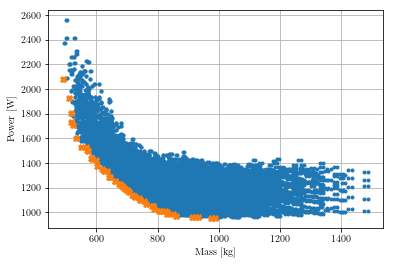

In [958]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('Optimum_red_2Hz.png',format = 'png', dpi=500,bbox_inches='tight')

array([35, 40, 45, 50, 55, 60])

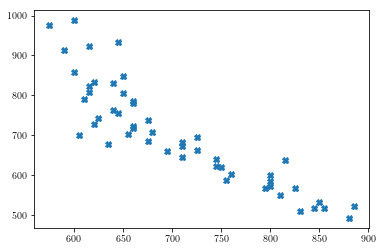

In [965]:
#plt.plot(m_T,m_La,'.')
plt.plot(m_f_p,m_p,'X')

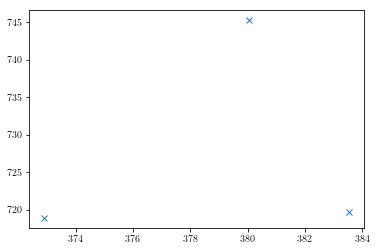

In [852]:
plt.plot(R4_p,m_p,'x')

In [715]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i],hf_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

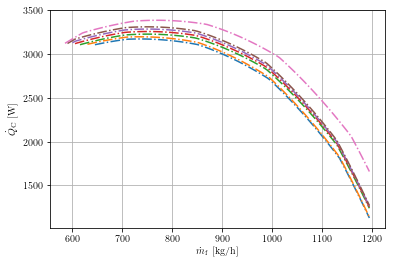

In [936]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'-.')
#plt.ylim(2900,4700)
plt.grid()
#plt.legend()
plt.xlabel(r'$\dot{m}_\mathrm{f}$ [kg/h]')
plt.ylabel(r'$\dot{Q}_\mathrm{C}$ [W]')
plt.savefig('Extra.png',format = 'png', dpi=1000,bbox_inches='tight')

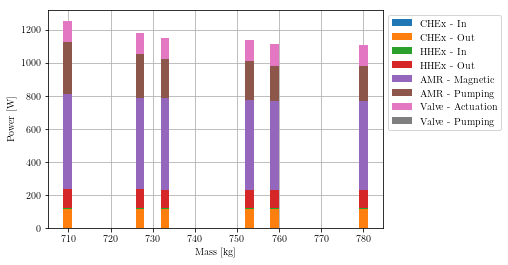

In [937]:
width = 2
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [938]:
m_La_p = np.pi*(np.array(R3_p)**2-np.array(R2_p)**2)*np.array(L_p)*(1-Epsilon)*7000*10**-9
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p = np.pi*((np.array(R4_p)+np.array(hf_p))**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 


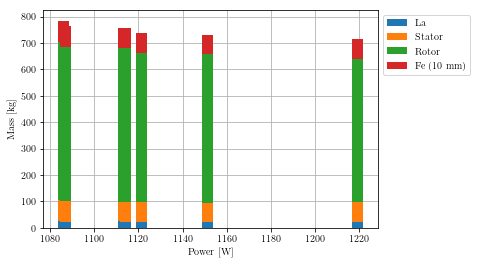

In [939]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')